# Анализ сотрудников компании и факторов увольнений (поиск инсайтов и составление рекомендаций стейкхолдерам)


# ФИО - **Латышев Сергей Евгеньевич**


# Постановка задачи:
1. Высокий уровень увольнения сотрудников может иметь серьезные последствия для организаций, приводя к увеличению затрат на подбор и обучение, снижению производительности и снижению морального духа сотрудников.
2. Для компаний крайне важно понимать основные факторы, способствующие увольнению, и принимать упреждающие меры для их устранения.

# Цель проекта:

1. Целью этого проекта является выполнение Исследовательского анализа данных (EDA) в наборе данных IBM HR Analytics Employee Attrition & Performance с использованием Python.
2. Цель состоит в том, чтобы получить представление о факторах, влияющих на увольнение сотрудников и их производительность в организации.
3. Изучая различные функции и проводя статистический анализ, мы стремимся выявить закономерности, тенденции и потенциальные области для улучшения, которые могут помочь компании лучше понять и управлять увольнением и производительностью сотрудников.

# Импорт библиотек

In [ ]:
# Библиотеки для обработки данных
import numpy as np
import pandas as pd

# Библиотеки для визуализации данных
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Библиотеки для статистического анализа
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Библиотеки для отображения всего набора данных
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

# Библиотека для преодоления предупреждений
import warnings
warnings.filterwarnings("ignore")

# Загрузка датасета

In [ ]:
df = pd.read_csv("Employee.csv", sep = ',', header = 0)

In [ ]:
df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Характеристики и описание набора данных
1. Age - возраст сотрудника
2. Gender - пол сотрудника
3. BusinessTravel - частота командировок сотрудников
4. DailyRate - дневная ставка заработной платы для сотрудников
5. Department - офис сотрудников
6. DistanceFromHome - расстояние от дома в милях до работы
7. Education - уровень образования, достигнутый персоналом
8. EducationField - область обучения сотрудника
9. EmployeeCount - Общее количество сотрудников в организации
10. EmployeeNumber - уникальный идентификатор для каждой записи сотрудника
11. EnvironmentSatisfaction - удовлетворенность сотрудников своей рабочей средой
12. HourlyRate - почасовая ставка для сотрудников
13. JobInvolvement - уровень вовлеченности, необходимый для работы сотрудника
14. JobLevel - уровень работы сотрудника
15. JobRole - роль сотрудников в организации
16. JobSatisfaction - удовлетворенность сотрудников своей работой
17. MaritalStatus - семейное положение работника
18. MonthlyIncome - ежемесячный доход работника
19. MonthlyRate - ежемесячная ставка заработной платы для сотрудников
20. NumCompaniesWorked - количество компаний, в которых работал сотрудник
21. Over18 - возраст работника от 18 лет
22. OverTime - работают ли сотрудники сверхурочно
23. PercentSalaryHike - ставка повышения заработной платы для сотрудников
24. PerformanceRating - рейтинг эффективности работника
25. RelationshipSatisfaction - удовлетворенность сотрудников отношениями
26. StandardHours - нормы рабочего времени для сотрудников
27. StockOptionLevel - уровень опционов на акции сотрудников
28. TotalWorkingYears - общее количество лет, отработанных работником
29. TrainingTimesLastYear - количество поездок сотрудников на обучение за последний год
30. WorkLifeBalance - восприятие сотрудниками своего баланса между работой и личной жизнью
31. YearsAtCompany - количество лет работы сотрудников в компании
32. YearsInCurrentRole - количество лет, в течение которых сотрудник занимал свою текущую должность
33. YearsSinceLastPromotion - количество лет с момента последнего повышения работника
34. YearsWithCurrManager - количество лет, в течение которых сотрудник работал со своим текущим руководителем
35. Attrition - сотрудник уходит из организации

# Обработка данных


Вычисление размерности набора данных

In [ ]:
df.shape

(1470, 35)


1. Всего в наборе данных 1470 записей/строк.
2. Всего в наборе данных 35 объектов/столбцов.

# Создание базовой информации об атрибутах.

In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 35 entries, Age to YearsWithCurrManager
dtypes: int64(26), object(9)
memory usage: 402.1+ KB


1. В наборе данных всего 26 числовых атрибутов.
2. С другой стороны, у нас есть 9 категориальных атрибутов.

# Отображение случайной выборки набора данных только с числовыми функциями

In [ ]:
df.select_dtypes(np.number).sample(5).style.set_properties(**{'background-color': '#E9F6E2',
                                                              'color': 'black','border-color': '#8b8c8c'})

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1368,34,735,22,4,1,1932,3,86,2,2,4,5747,26496,1,15,3,2,80,0,16,3,3,15,10,6,11
1402,31,1276,2,1,1,1974,4,59,1,1,4,1129,17536,1,11,3,3,80,3,1,4,3,1,0,0,0
1462,39,722,24,1,1,2056,2,60,2,4,4,12031,8828,0,11,3,1,80,1,21,2,2,20,9,9,6
207,36,635,18,1,1,286,2,73,3,1,4,2153,7703,1,13,3,1,80,0,8,2,3,8,1,1,7
574,34,182,1,4,1,797,2,72,4,1,4,3280,13551,2,16,3,3,80,0,10,2,3,4,2,1,3


1. Некоторые числовые функции хранят категории, помеченные числами.
2. Поэтому для лучшего анализа мы заменим эти помеченные числовые значения соответствующими категориальными значениями.

# Маркировка категорий в числовых функциях

Значения, используемые ниже для обозначения категорий, приведены в описании набора данных

In [ ]:
df["Education"] = df["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobInvolvement"] = df["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobLevel"] = df["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level", 5:"Executive Level"})
df["JobSatisfaction"] = df["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["PerformanceRating"] = df["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})
df["Education"] = df["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})

# Отображение случайной выборки набора данных только с категориальными функциями

In [ ]:
df.select_dtypes(include="O").sample(5).style.set_properties(**{'background-color': '#E9F6E2',
                                                                'color': 'black','border-color': '#8b8c8c'})

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
746,No,Non-Travel,Research & Development,Below College,Life Sciences,Medium,Female,Low,Executive Level,Research Director,High,Divorced,Y,No,Outstanding,Medium,Better
578,No,Travel_Frequently,Research & Development,Master,Life Sciences,Low,Female,Very High,Junior Level,Manufacturing Director,Low,Single,Y,Yes,Excellent,Very High,Better
522,No,Travel_Rarely,Research & Development,College,Life Sciences,Very High,Male,Very High,Entry Level,Research Scientist,Very High,Single,Y,No,Excellent,Low,Better
411,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Low,Female,High,Executive Level,Manager,Low,Married,Y,No,Excellent,Very High,Bad
135,No,Travel_Rarely,Research & Development,College,Medical,Medium,Male,High,Junior Level,Manufacturing Director,Medium,Divorced,Y,No,Outstanding,Very High,Better


# Проверка наличия повторяющихся записей

In [ ]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

Поскольку вывод False, мы можем сказать, что в наборе данных нет повторяющихся записей.

# Вычисление общего количества пропущенных значений и процента пропущенных значений

In [ ]:
missing_df = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


Ни один из атрибутов не имеет пропущенных значений.


# Выполнение описательного анализа числовых атрибутов

* Count: показывает количество значений, которые не отсутствуют в каждом столбце.
* Mean: показывает среднее значение в каждом столбце.
* Std: показывает стандартное отклонение значений в каждом столбце.
* Min : показывает наименьшее значение в каждом столбце.
* Max : показывает максимальное значение в каждом столбце.
* 25%, 50%, 75%: значения соответствуют делению данных на 25%, 50% и 75% процентили.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0


1. Минимальный возраст составляет 18 лет, что означает, что все сотрудники являются взрослыми. Таким образом, для нашего анализа нет необходимости в атрибуте Over18.
2. Значение стандартного отклонения для EmployeeCount и StandardHours равно 0,00, что означает, что все значения, представленные в этом атрибуте, одинаковы.
3. Атрибут EmployeeNumber представляет собой уникальное значение для каждого из сотрудников, что не дает никакой содержательной информации.
4. Поскольку этот атрибут не дает никакой значимой информации для нашего анализа, мы можем просто отбросить эти атрибуты.

# Отбрасывание атрибутов, что не подразумевает каких-либо значимых идей в нашем анализе

In [ ]:
cols = ["Over18","EmployeeCount","EmployeeNumber","StandardHours"]

df.drop(columns=cols, inplace=True)

# Выполнение описательного анализа категориальных атрибутов

- Count: показывает количество значений, которые не отсутствуют в каждом столбце.
- Unique: показывает количество уникальных значений, присутствующих в каждом столбце.
- Top: показывает, какое категориальное значение больше всего присутствует в каждом столбце.
- Freq: показывает частоту появления категориального значения в каждом из столбцов.

In [ ]:
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,Entry Level,543
JobRole,1470,9,Sales Executive,326


1. Все категориальные атрибуты имеют низкую кардинальность
2. Колонки Attrition and OverTime смещены в сторону No Category
3. Атрибут Businesstravel смещен в сторону категории Travel_Rarely

# Проверка уникальных значений категориальных атрибутов

In [ ]:
cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(df[column]))
    print("-"*127)

Unique values of  Attrition {'Yes', 'No'}
-------------------------------------------------------------------------------------------------------------------------------
Unique values of  BusinessTravel {'Travel_Rarely', 'Non-Travel', 'Travel_Frequently'}
-------------------------------------------------------------------------------------------------------------------------------
Unique values of  Department {'Human Resources', 'Research & Development', 'Sales'}
-------------------------------------------------------------------------------------------------------------------------------
Unique values of  Education {'Master', 'Below College', 'College', 'Doctor', 'Bachelor'}
-------------------------------------------------------------------------------------------------------------------------------
Unique values of  EducationField {'Other', 'Marketing', 'Technical Degree', 'Medical', 'Life Sciences', 'Human Resources'}
----------------------------------------------------------------

1. Набор значений категориальных атрибутов является полным и простым для понимания.
2. Таким образом, нам не нужно выполнять шаги предварительной обработки для этих атрибутов.

# Исследовательский анализ данных

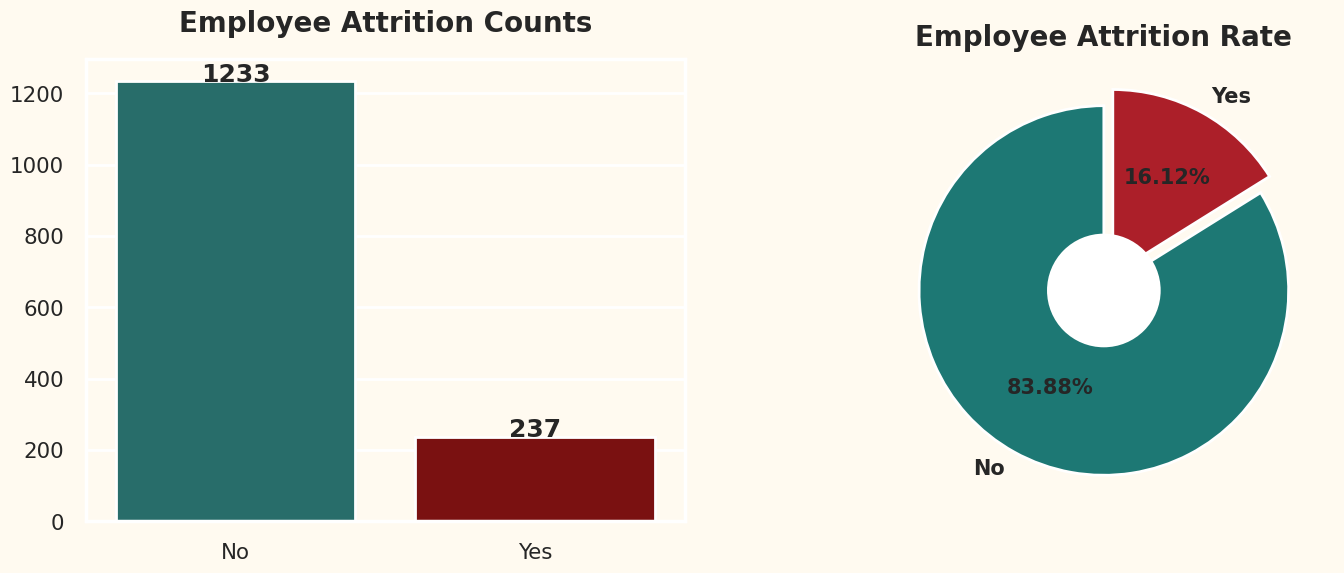

In [ ]:
# Визуализация, чтобы показать убыль сотрудников
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette=["#1d7874","#8B0000"])
plt.title("Employee Attrition Counts",fontweight="black",size=20,pad=20)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=20,pad=10)
plt.show()

1. Уровень текучести кадров данной организации составляет 16,12%.
2. По мнению экспертов в области управления персоналом, уровень текучести кадров от 4% до 6% является нормальным для организации.
3. Таким образом, можно сказать, что уровень текучести кадров в организации находится на опасном уровне.
4. Следовательно, организация должна принять меры по снижению уровня отсева.

# Анализ увольнения сотрудников по полу

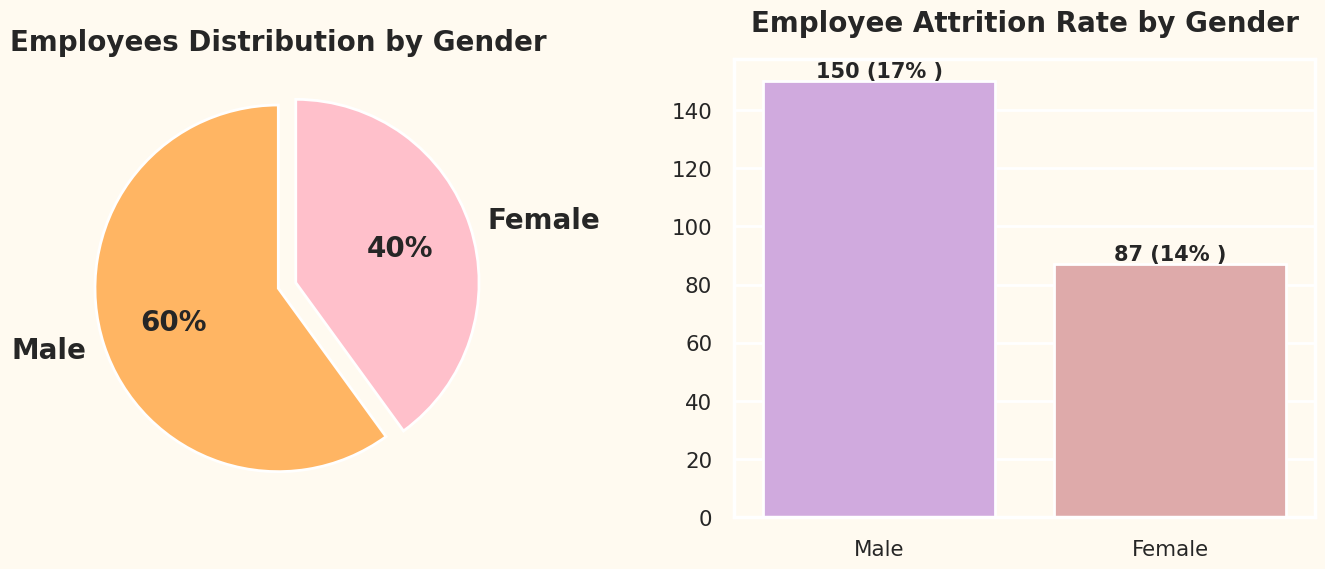

In [ ]:
# Визуализация для отображения общего числа сотрудников по полу
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
gender_attrition = df["Gender"].value_counts()
plt.title("Employees Distribution by Gender",fontweight="black",size=20)
plt.pie(gender_attrition, autopct="%.0f%%",labels=gender_attrition.index,textprops=({"fontweight":"black","size":20}),
        explode=[0,0.1],startangle=90,colors= ["#ffb563","#FFC0CB"])

# Визуализация, показывающая убыль сотрудников по полу
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_1 = df["Gender"].value_counts()
value_2 = new_df["Gender"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by Gender",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Количество сотрудников-мужчин в организации превышает удельный вес сотрудников-женщин более чем на 20%.
2. Сотрудники-мужчины увольняются из организации чаще, чем сотрудники-женщины.

# Анализ увольнения сотрудников по возрасту

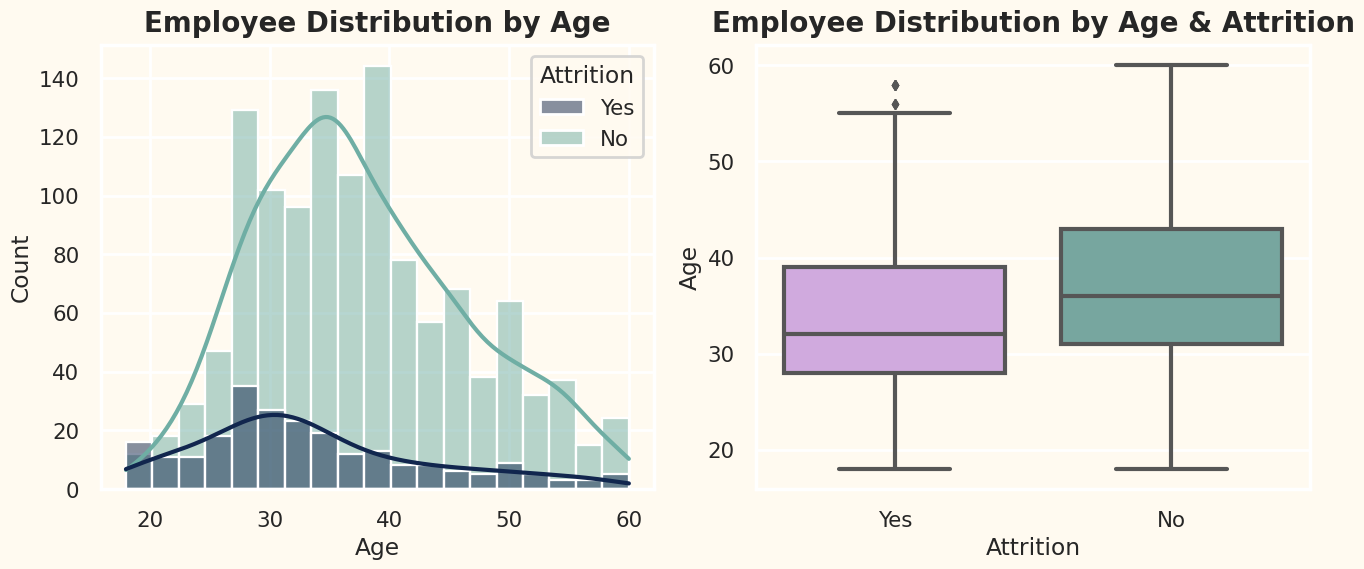

In [ ]:
# Визуализация для отображения распределения сотрудников по возрасту
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="Age",hue="Attrition",data=df,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Age",fontweight="black",size=20,pad=10)

# Визуализация, показывающая распределение сотрудников по возрасту и убыли
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="Age",data=df,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Distribution by Age & Attrition",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

1. Большинству сотрудников от 30 до 40 лет.
2. Мы можем ясно наблюдать тенденцию, что с возрастом убыль уменьшается.
3. Из диаграммы также видно, что средний возраст сотрудников, покинувших организацию, меньше, чем у сотрудников, работающих в организации.
4. Работники молодого возраста увольняются из компании чаще, чем работники более старшего возраста.

# Анализ убыли сотрудников по деловым поездкам

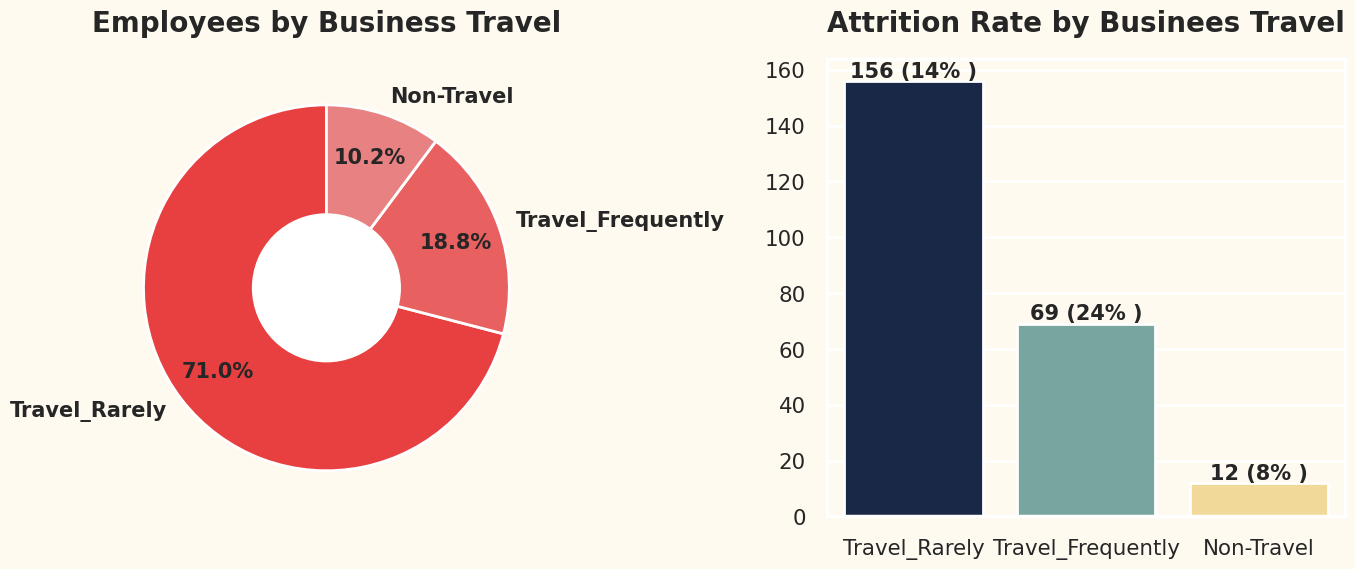

In [ ]:
# Визуализация для отображения общего количества сотрудников по Businees Travel
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["BusinessTravel"].value_counts()
plt.title("Employees by Business Travel", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Визуализация, показывающая коэффициент убыли от Businees Travel
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["BusinessTravel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Businees Travel",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Большинство сотрудников организации Путешествуют Редко.
2. Наибольшая текучесть кадров наблюдается у тех сотрудников, которые часто путешествуют.
3. Наименьшая текучесть кадров наблюдается у тех сотрудников, которые не путешествуют.

# Решение

1. Организация может разделить поездки между сотрудниками, чтобы снизить нагрузку на сотрудников, которые часто путешествуют.
2. Это, безусловно, поможет снизить уровень текучести кадров в отношении деловых поездок.

# Анализ увольнения сотрудников по отделам

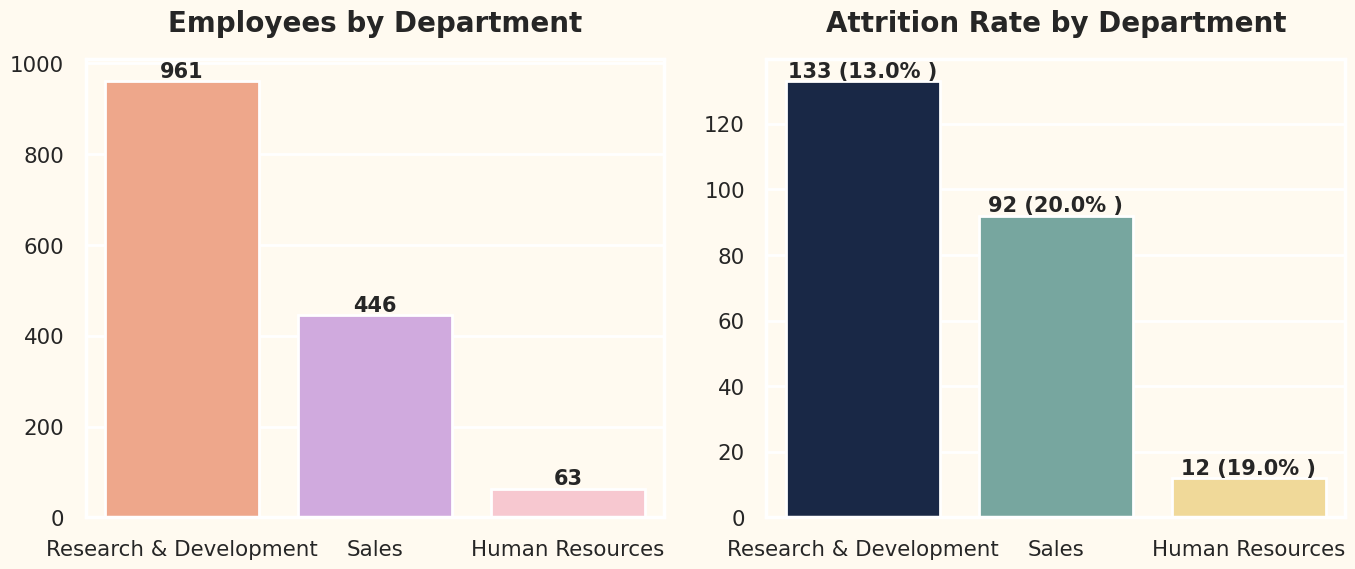

In [ ]:
# Визуализация для отображения общего количества сотрудников по отделам
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["Department"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB"])
plt.title("Employees by Department",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15,)

# Визуализация для отображения коэффициента убыли сотрудников по отделам
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["Department"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Department",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Большинство сотрудников работают в отделе исследований и разработок.
2. Наибольшая убыль в отделе продаж.
3. Уровень текучести кадров в отделе кадров также очень высок.
4. Несмотря на то, что среди самых высокопоставленных сотрудников в отделе исследований и разработок наблюдается наименьшая убыль по сравнению с другими отделами.

# Анализ убыли сотрудников по DailyRate

* DailyRate показывает ежедневную ставку заработной платы для сотрудников.
* Чтобы получить значимую информацию, мы можем разделить дневные ставки на три группы для значимого анализа.

In [ ]:
df["DailyRate"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,1470.0,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0


In [ ]:
# Определяем края бинов для групп
bin_edges = [0, 500, 1000, 1500]

# Определим метки для групп
bin_labels = ['Low DailyRate', 'Average DailyRate', 'High DailyRate']

# Разделим столбец DailyRate на группы
df['DailyRateGroup'] = pd.cut(df['DailyRate'], bins=bin_edges, labels=bin_labels)

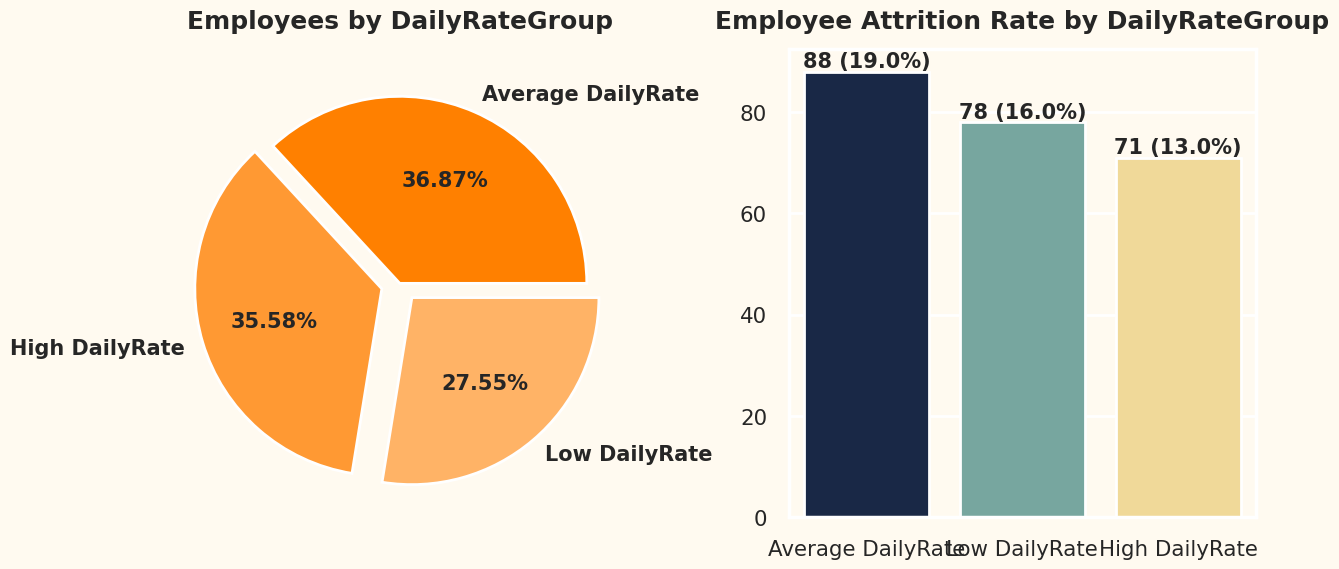

In [ ]:
# Визуализация для отображения общего количества сотрудников по DailyRateGroup
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["DailyRateGroup"].value_counts()
plt.pie(value_1.values, labels=value_1.index,autopct="%.2f%%",textprops={"fontweight":"black","size":15},
        explode=[0,0.1,0.1],colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'])
plt.title("Employees by DailyRateGroup",fontweight="black",pad=15,size=18)

# Визуализация для отображения коэффициента убыли по DailyRateGroup
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["DailyRateGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Employee Attrition Rate by DailyRateGroup",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",fontweight="black",size=15)

plt.tight_layout()
plt.show()

1. Работники со средней дневной ставкой и высокой дневной ставкой примерно равны.
2. Но уровень отсева очень высок среди сотрудников со средней дневной ставкой по сравнению с сотрудниками с высокой дневной ставкой. 3. Уровень отсева также высок среди сотрудников с низкой дневной ставкой. 4. Сотрудники, которые не получают Высокую дневную ставку, в основном увольняются из организации.

# Анализ увольнения сотрудников по расстоянию от дома

In [ ]:
print("Total Unique Values in Attribute is =>",df["DistanceFromHome"].nunique())

Total Unique Values in Attribute is => 29


In [ ]:
df["DistanceFromHome"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0


In [ ]:
# Определяем края бинов для групп
bin_edges = [0,2,5,10,30]

# Определяем метки для групп
bin_labels = ['0-2 kms', '3-5 kms', '6-10 kms',"10+ kms"]

# Разделяем столбец DistaanceFromHome на группы
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

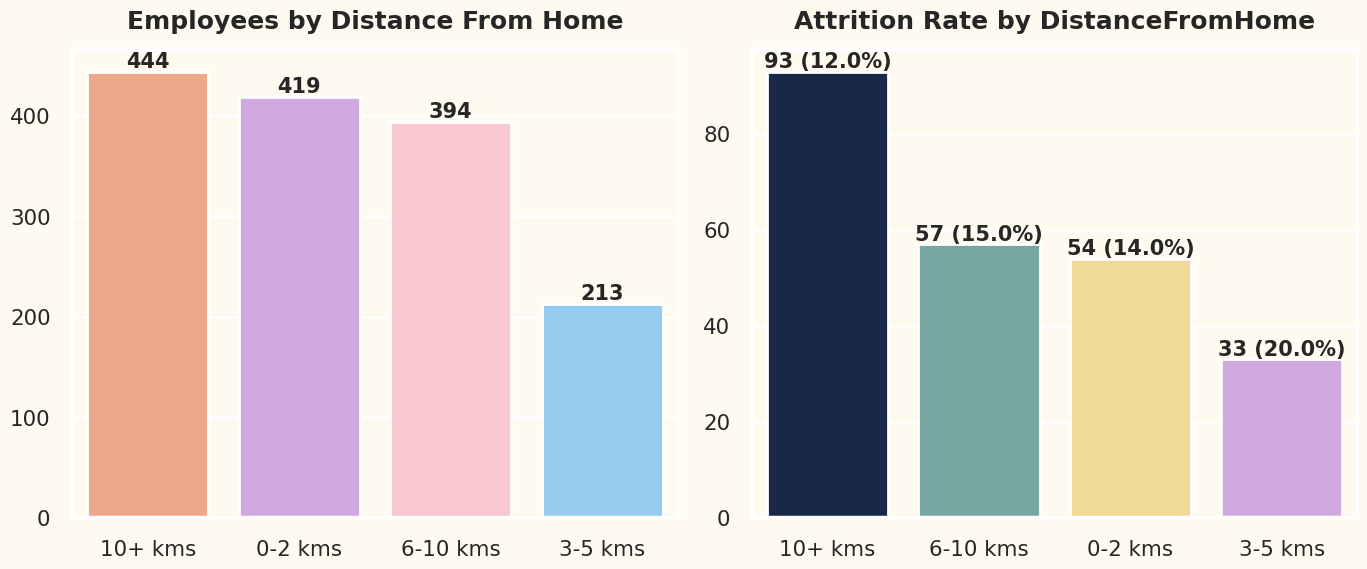

In [ ]:
# Визуализация для отображения общего количества сотрудников по DistnaceFromHome
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["DistanceGroup"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Distance From Home",fontweight="black",pad=15,size=18)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)

# Визуализация для отображения коэффициента убыли по DistanceFromHome
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["DistanceGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by DistanceFromHome",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",fontweight="black",size=15)

plt.tight_layout()
plt.show()

1. В организации есть все виды сотрудников, которые находятся рядом или находятся далеко от офиса.
2. Функция «Расстояние от дома» не следует какой-либо тенденции в уровне отсева.
3. Сотрудники, находящиеся рядом с организацией, чаще уходят, чем сотрудники, находящиеся далеко от организации.

# Анализ отсева сотрудников по образованию

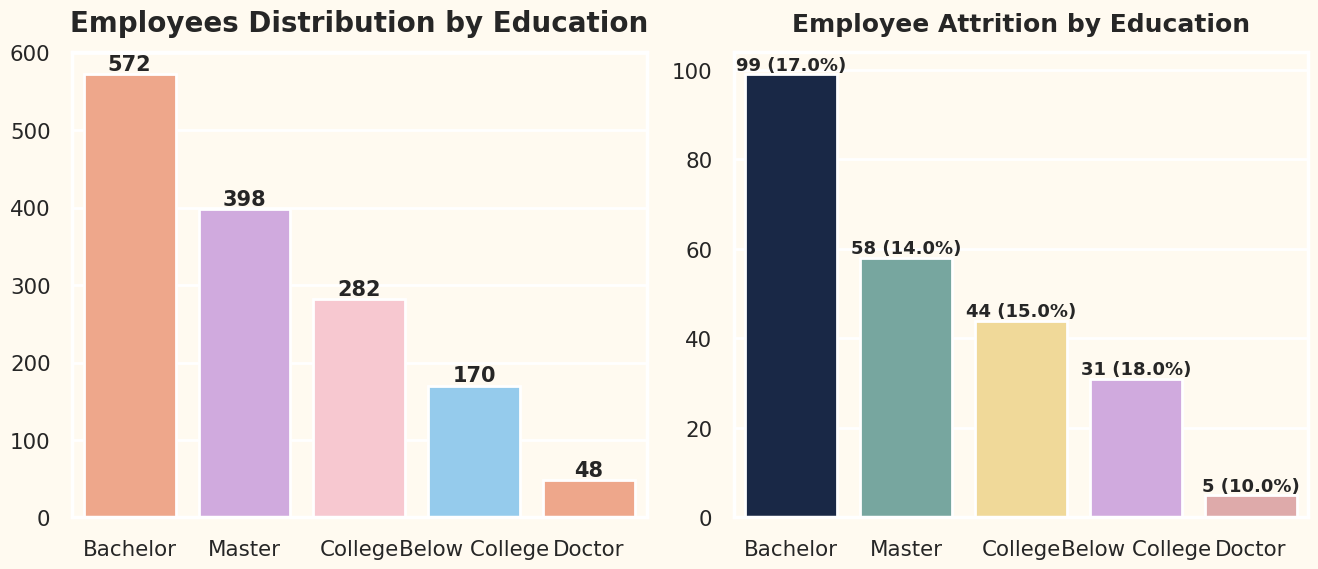

In [ ]:
# Визуализация для отображения общего количества сотрудников по образованию
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
value_1 = df["Education"].value_counts()
sns.barplot(x=value_1.index,y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees Distribution by Education",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)

# Визуализация, показывающая убыль сотрудников по образованию
plt.subplot(1,2,2)
value_2 = new_df["Education"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition by Education",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.tight_layout()
plt.show()

1. Большинство сотрудников организации имеют степень бакалавра или магистра в качестве образовательной квалификации.
2. Очень немногие сотрудники организации имеют степень доктора наук в качестве образовательной квалификации.
3. Наблюдается тенденция снижения отсева по мере повышения образовательного ценза.

# Анализ отсева сотрудников по сферам образования.

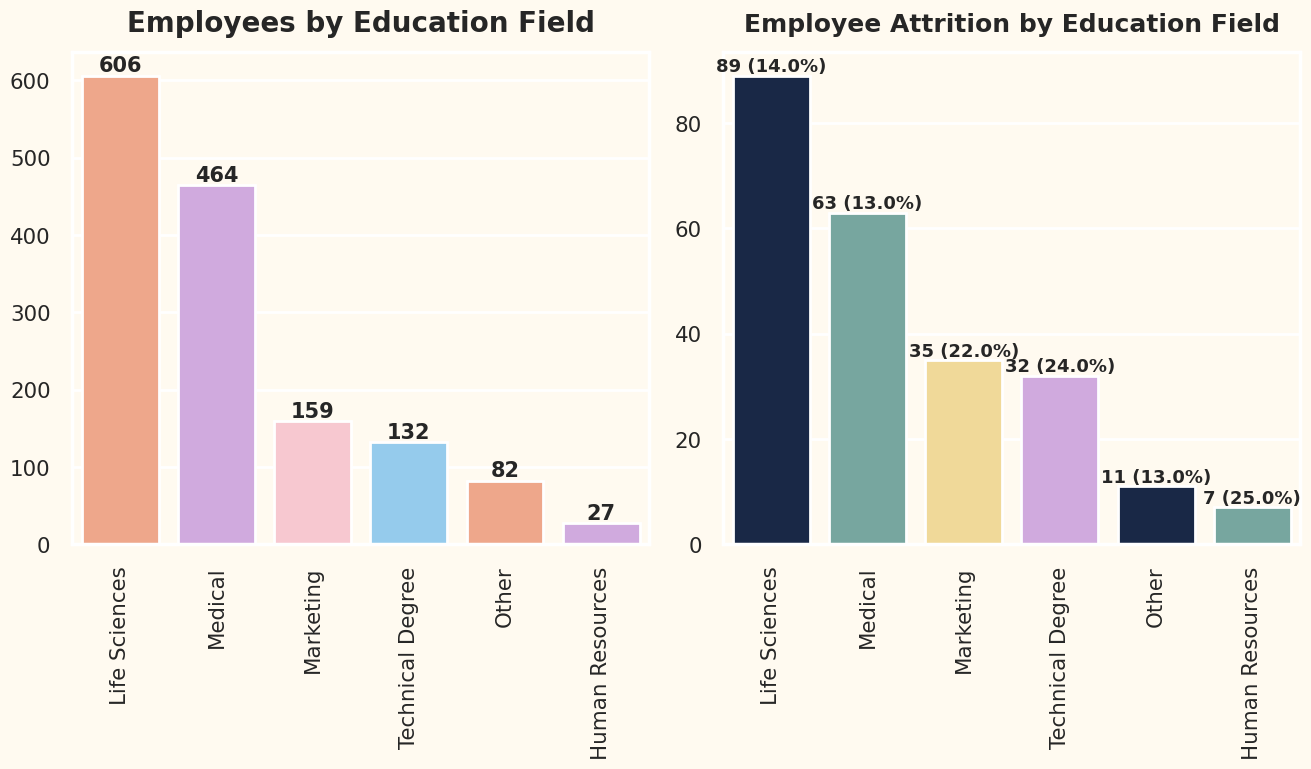

In [ ]:
# Визуализация для отображения общего числа сотрудников по областям образования
plt.figure(figsize=(13.5,8))
plt.subplot(1,2,1)
value_1 = df["EducationField"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Education Field",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
plt.xticks(rotation=90)

# Визуализация, показывающая убыль сотрудников по областям образования
plt.subplot(1,2,2)
value_2 = new_df["EducationField"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7"])
plt.title("Employee Attrition by Education Field",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1. Большинство сотрудников работают либо в области наук о жизни, либо в области медицинского образования.
2. Очень мало сотрудников из сферы образования кадров.
3. В таких областях образования, как управление персоналом, маркетинг, техническое образование, наблюдается очень высокий уровень отсева.
4. Это может быть из-за рабочей нагрузки, потому что в этих областях образования очень мало сотрудников по сравнению с областью образования с меньшим уровнем отсева.

# Анализ отсева сотрудников по удовлетворенности окружающей средой

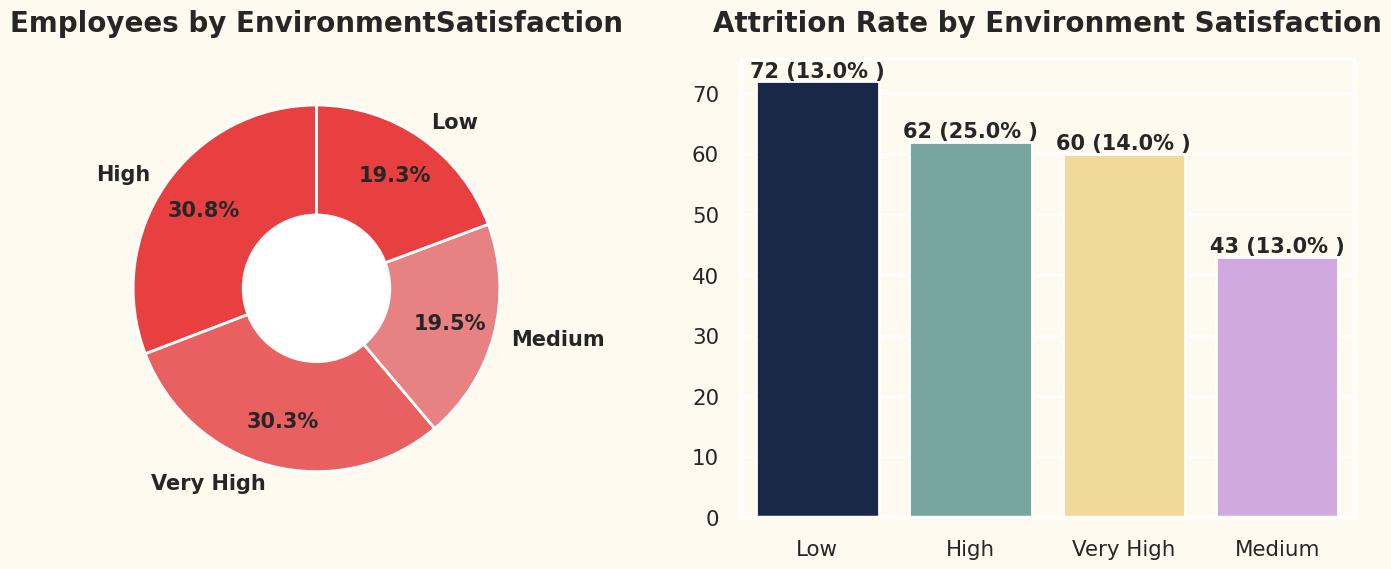

In [ ]:
# Визуализация, чтобы показать общее количество сотрудников по EnvironmentSatisfaction
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["EnvironmentSatisfaction"].value_counts()
plt.title("Employees by EnvironmentSatisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Визуализация, показывающая коэффициент истощения по EnvironmentSatisfaction
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["EnvironmentSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Environment Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Большинство сотрудников высоко и очень высоко оценили удовлетворенность организационной средой.
2. Несмотря на то, что удовлетворенность организационной средой высока, в этой среде очень высока текучесть кадров.
3. Уровень отсева увеличивается с повышением уровня удовлетворенности окружающей средой.

# Анализ увольнения сотрудников по должностям

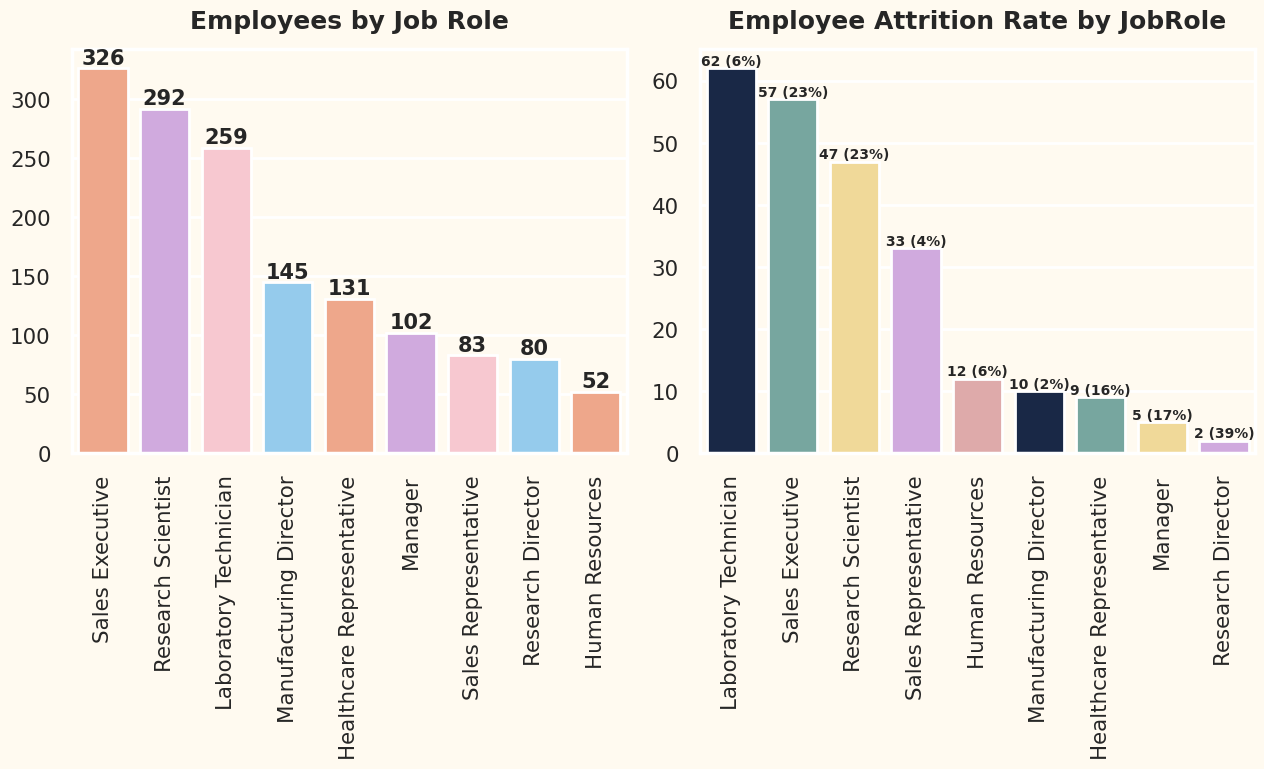

In [ ]:
# Визуализация для отображения общего количества сотрудников по JobRole
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
value_1 = df["JobRole"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Job Role",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)

# Визуализация для отображения коэффициента убыли по JobRole
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobRole"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by JobRole",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             fontweight="black",size=10)

plt.tight_layout()
plt.show()

1. Большинство сотрудников работает менеджером по продажам, научным сотрудником или лаборантом. в этой организации.
2. Самые высокие показатели отсева отмечаются в таких секторах, как директор по исследованиям, руководитель отдела продаж, научный сотрудник.

# Анализ увольнения сотрудников по уровню работы

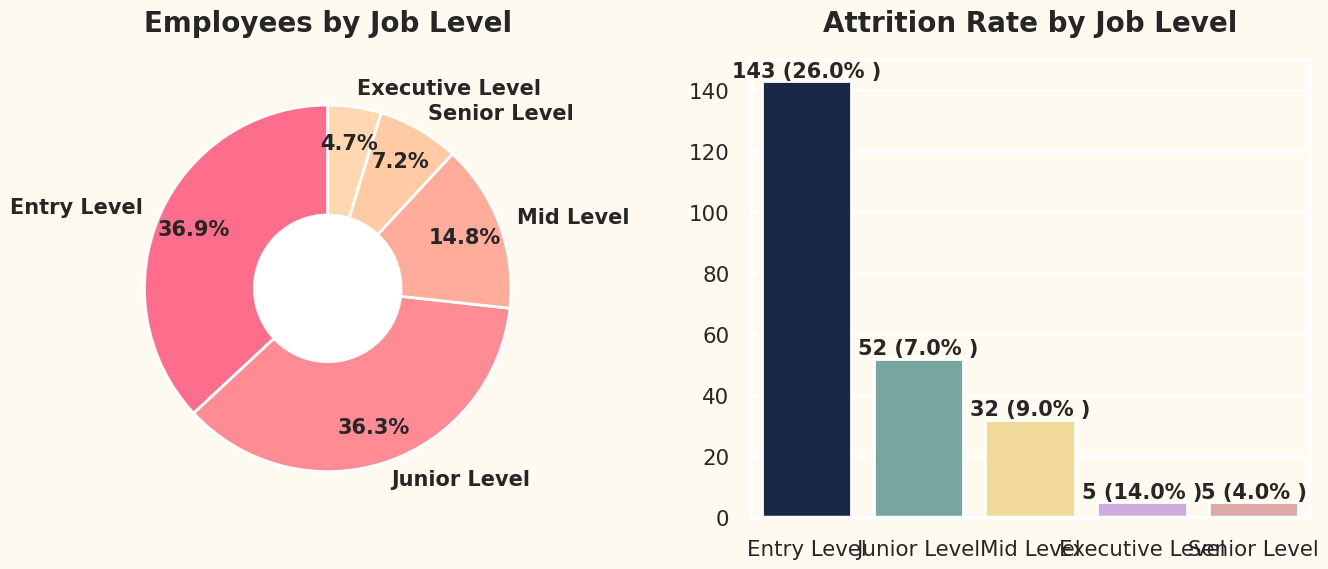

In [ ]:
# Визуализация для отображения общего числа сотрудников по уровням работы
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["JobLevel"].value_counts()
plt.title("Employees by Job Level", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4',"#FFD8B1"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Визуализация для отображения коэффициента отсева по JobLevel
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobLevel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Level",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Большинство сотрудников организации находятся на начальном или младшем уровне.
2. Наибольшее истощение приходится на начальный уровень.
3. По мере повышения уровня скорость отсева уменьшается.

# Анализ увольнения сотрудников по удовлетворенности работой.

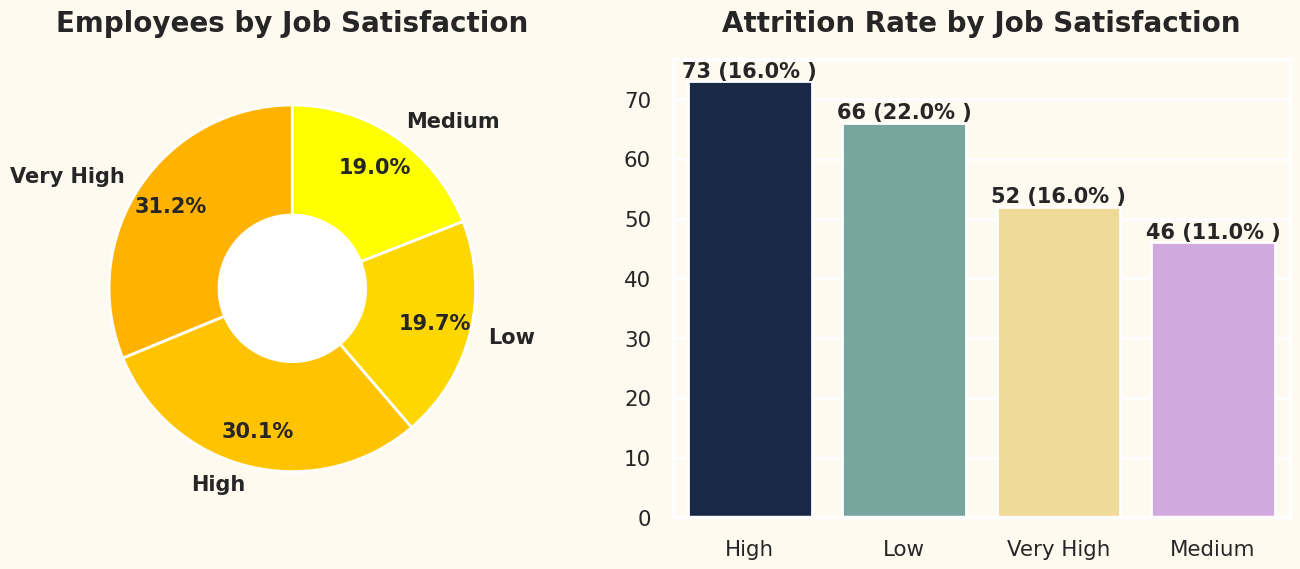

In [ ]:
# Визуализация для отображения общего числа сотрудников по удовлетворенности работой
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["JobSatisfaction"].value_counts()
plt.title("Employees by Job Satisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Визуализация для отображения коэффициента убыли по удовлетворенности работой
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Большинство сотрудников оценили свою удовлетворенность работой как высокую или очень высокую.
2. Работники, которые низко оценили свою удовлетворенность работой, в основном покидают организацию.
3. Все категории удовлетворенности работой имеют высокий уровень отсева.

# Анализ увольнения сотрудников по семейному положению

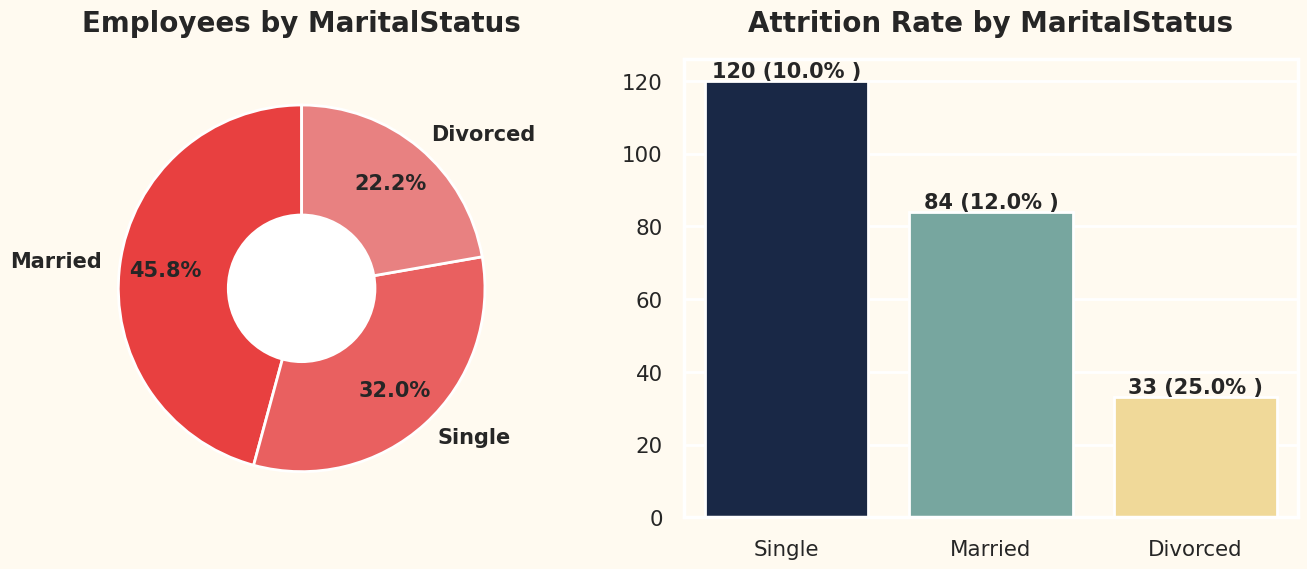

In [ ]:
# Визуализация для отображения общего количества сотрудников по семейному положению
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["MaritalStatus"].value_counts()
plt.title("Employees by MaritalStatus", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Визуализация для отображения коэффициента отсева по семейному положению
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["MaritalStatus"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by MaritalStatus",
          fontweight="black",
          size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Большинство сотрудников в организации состоят в браке.
2. Очень высок процент увольнения разведенных сотрудников.
3. Низкий уровень текучести среди одиноких сотрудников.

# Анализ увольнения сотрудников по ежемесячному доходу

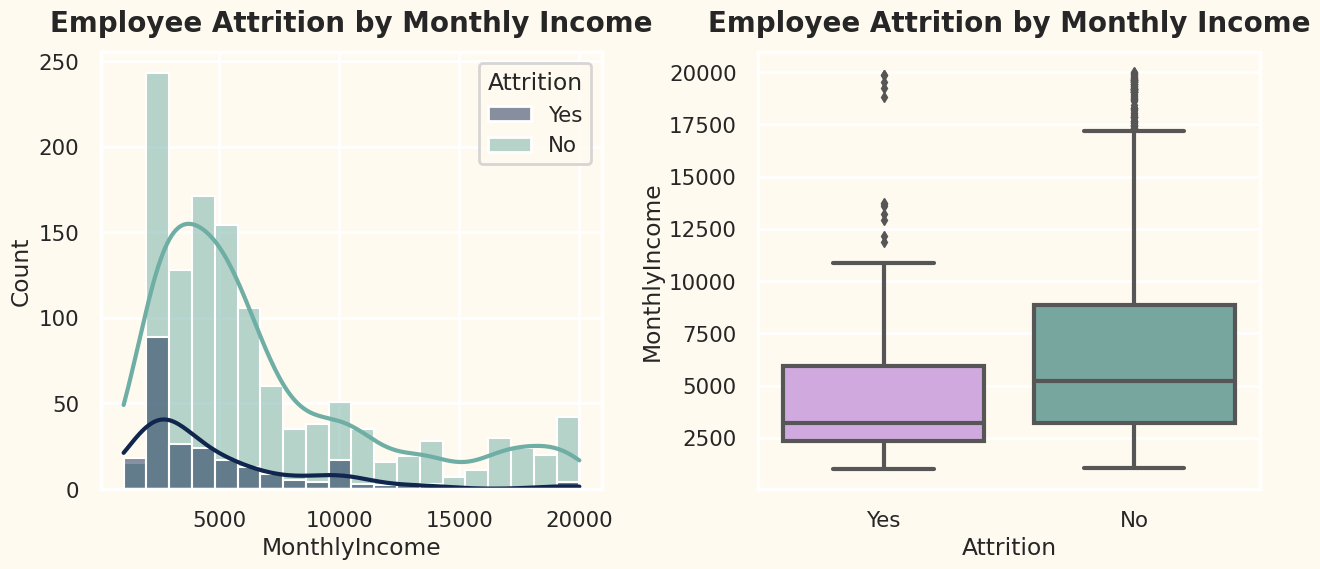

In [ ]:
# Визуализация для отображения распределения сотрудников по месячному доходу
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="MonthlyIncome", hue="Attrition", kde=True ,data=df,palette=["#11264e","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)

# Визуализация, показывающая убыль сотрудников по ежемесячному доходу
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="MonthlyIncome",data=df,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

1. Большинству сотрудников в организации платят меньше 10000.
2. Среднемесячный доход уволившегося работника сравнительно низок по сравнению с работником, который все еще работает.
3. По мере увеличения ежемесячного дохода убыль уменьшается.

# Анализ отсева сотрудников по месячной ставке

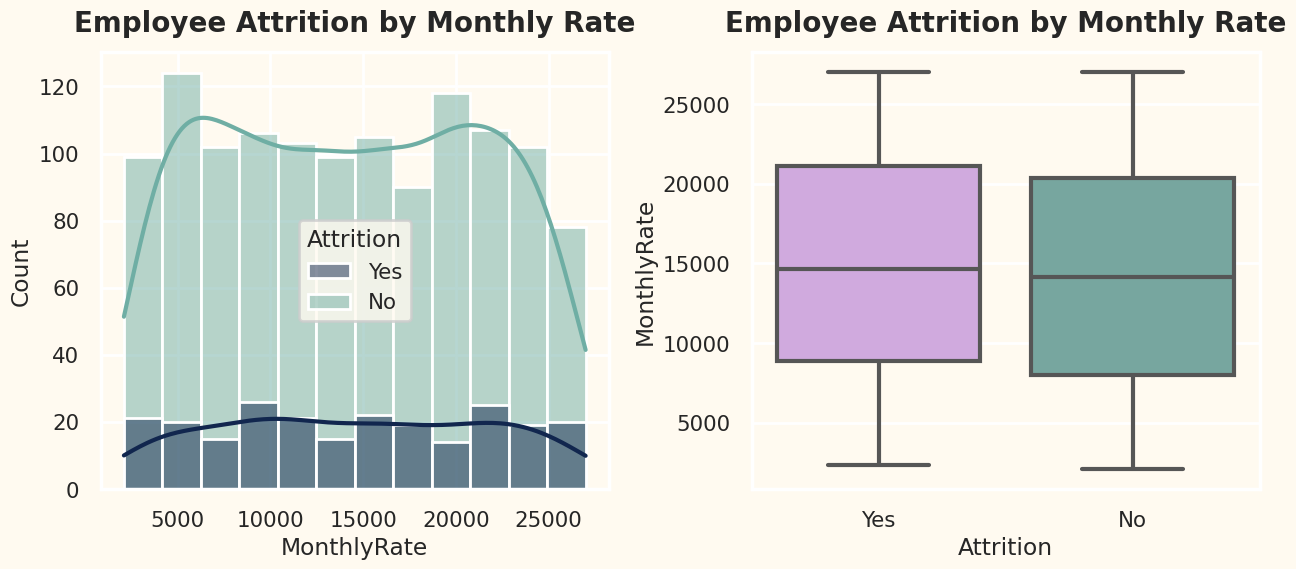

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="MonthlyRate", hue="Attrition", data=df,kde=True, palette=["#11264e","#6faea4"])
plt.title("Employee Attrition by Monthly Rate",fontweight="black",size=20,pad=15)

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="MonthlyRate",data=df,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Attrition by Monthly Rate",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

1. Распределение MonthlyRate одинаково по всей колонке.
2. Таким образом, эта функция не дает никакой значимой информации об увольнении сотрудников.

# Анализ увольнения сотрудников по количеству компаний, в которых он работал

In [ ]:
df["NumCompaniesWorked"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0


In [ ]:
# Определяем края бинов для групп
bin_edges = [0, 1, 3, 5, 10]

# Определяем метки для групп
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "5+ companies"]

# Разделяем столбец DailyRate на группы
df["NumCompaniesWorkedGroup"] = pd.cut(df['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

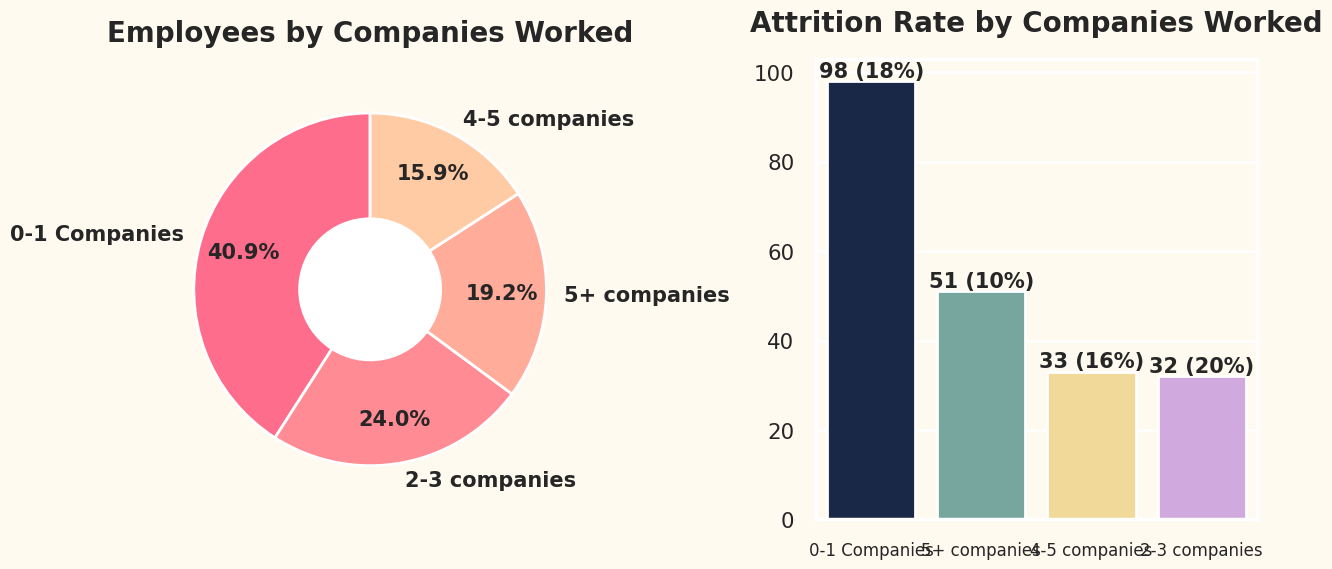

In [ ]:
# Визуализация для отображения общего количества сотрудников по NumCompaniesWorked
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["NumCompaniesWorkedGroup"].value_counts()
plt.title("Employees by Companies Worked", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Визуализация для отображения коэффициента убыли по NumCompaniesWorked.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["NumCompaniesWorkedGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Companies Worked",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.xticks(size=12)
plt.tight_layout()
plt.show()

1. Большинство сотрудников работали менее чем в 2 компаниях.
2. Высок процент отсева сотрудников, проработавших менее чем в 5 компаниях.

# Анализ убыли сотрудников с течением времени

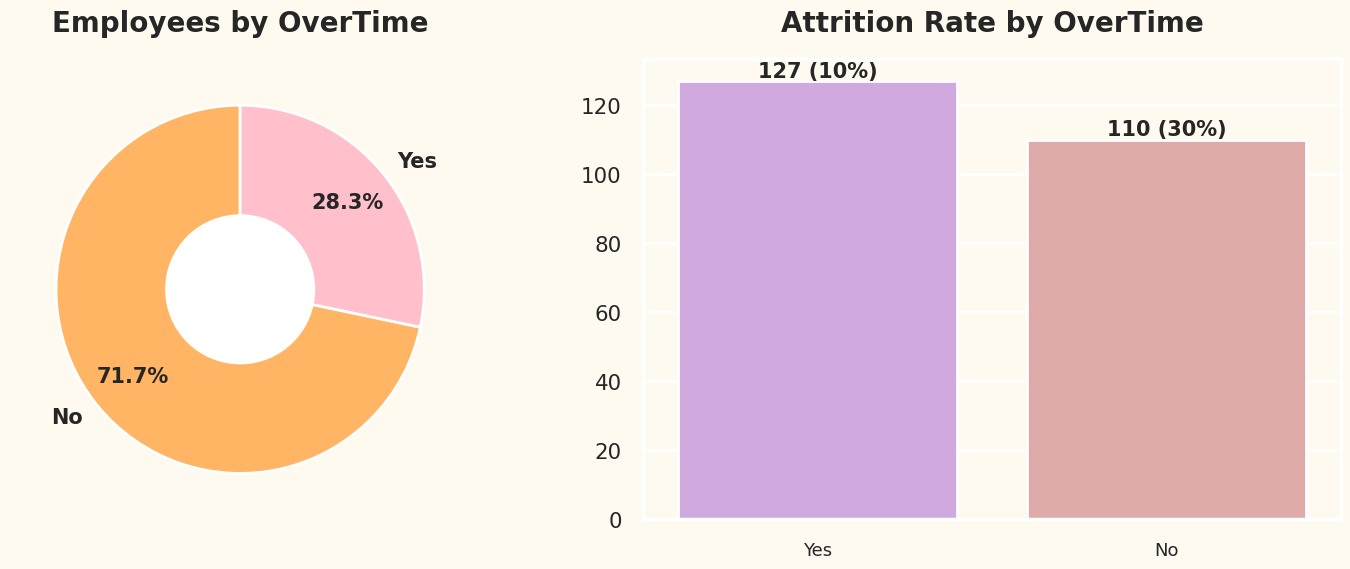

In [ ]:
# Визуализация для отображения общего числа сотрудников по сверхурочной работе.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
value_1 = df["OverTime"].value_counts()
plt.title("Employees by OverTime", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=["#ffb563","#FFC0CB"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Визуализация для отображения коэффициента истощения по сверхурочной работе
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["OverTime"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by OverTime",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.xticks(size=13)
plt.tight_layout()
plt.show()

1. Большинство сотрудников не работают сверхурочно.
2. Функция OverTime имеет очень высокий дисбаланс классов, из-за которого мы не можем сделать никаких осмысленных выводов.

# Анализ увольнения сотрудников по процентному увеличению заработной платы.

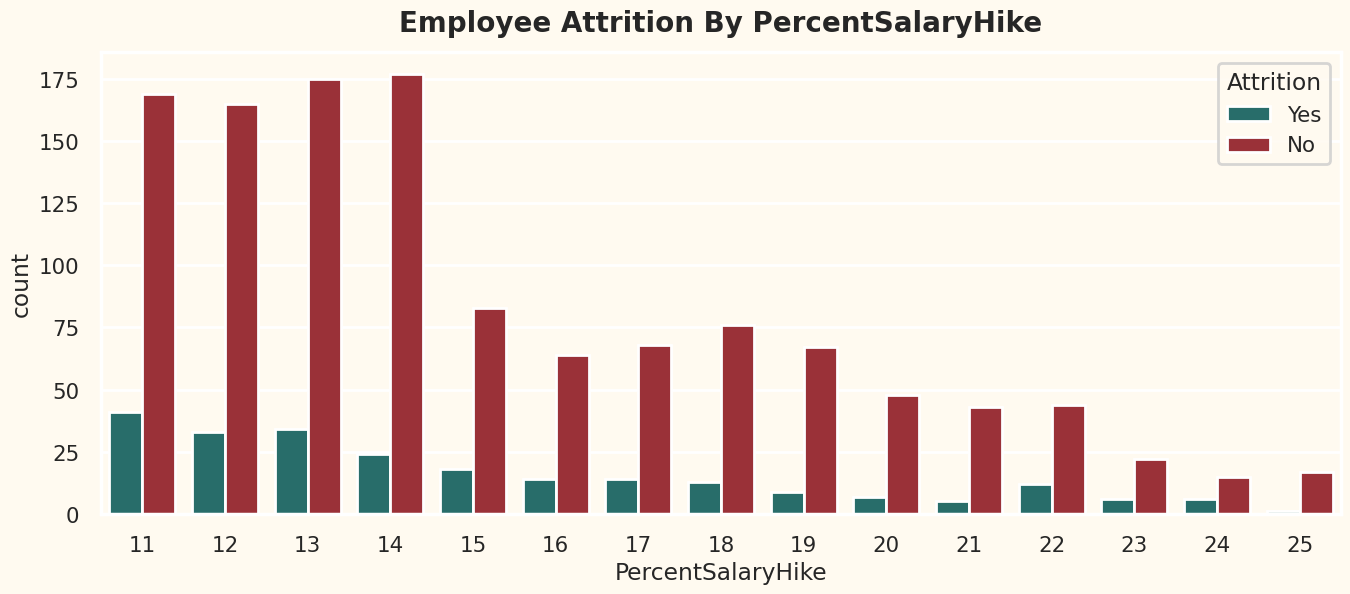

In [ ]:
# Визуализация, показывающая распределение сотрудников по процентному увеличению заработной платы.
plt.figure(figsize=(16,6))
sns.countplot(x="PercentSalaryHike", hue="Attrition", data=df, palette=["#1d7874","#AC1F29"])
plt.title("Employee Attrition By PercentSalaryHike",fontweight="black",size=20,pad=15)
plt.show()

1. Очень немногие сотрудники получают высокую процентную надбавку к зарплате.
2. По мере увеличения размера процентной ставки процент отсева уменьшается.

# Анализ увольнения сотрудников по рейтингу производительности

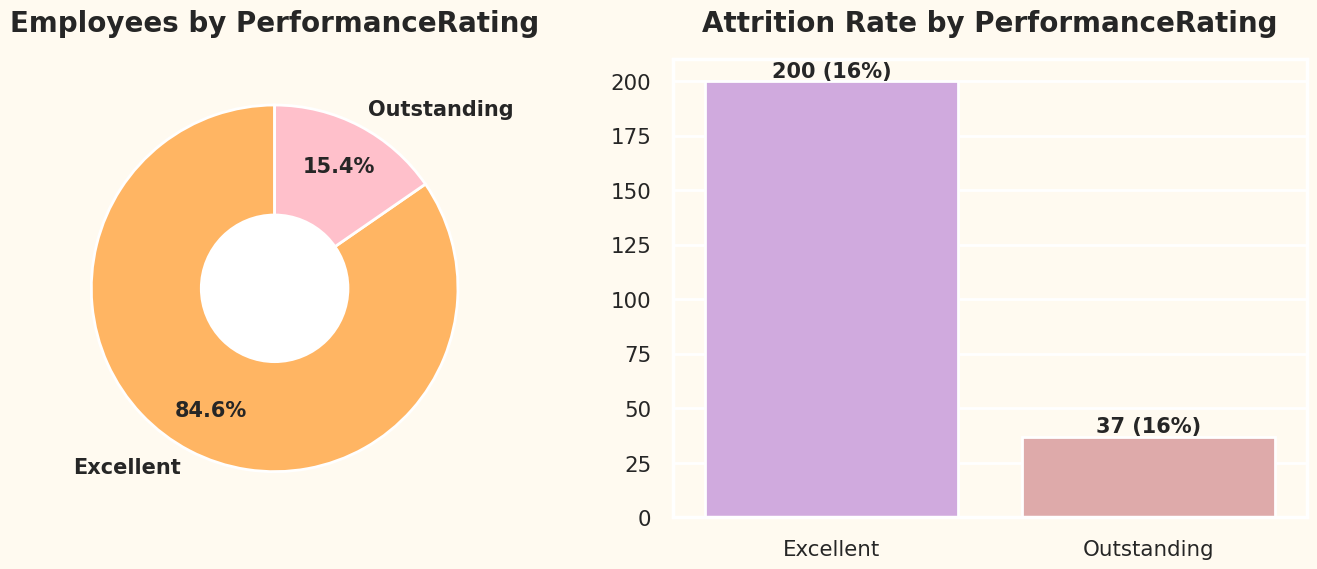

In [ ]:
# Визуализация для отображения общего числа сотрудников по рейтингу производительности
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["PerformanceRating"].value_counts()
plt.title("Employees by PerformanceRating", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=["#ffb563","#FFC0CB"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Визуализация для отображения коэффициента убыли по PerformanceRating
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["PerformanceRating"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by PerformanceRating",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Большинство сотрудников имеют отличные показатели производительности.
2. Обе категории в этом поле имеют одинаковую скорость истощения.
3. Вот почему мы не можем генерировать никаких осмысленных выводов.

# Анализ увольнения сотрудников по удовлетворенности отношениями

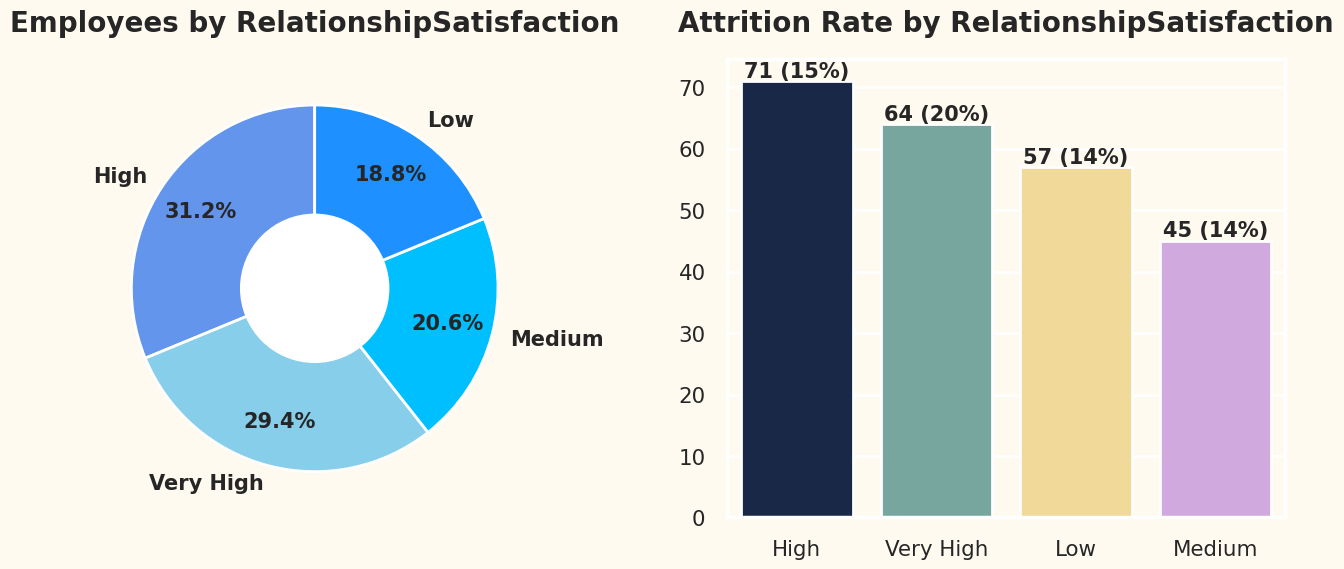

In [ ]:
# Визуализация для отображения общего количества сотрудников по удовлетворенности отношениями
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["RelationshipSatisfaction"].value_counts()
plt.title("Employees by RelationshipSatisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Визуализация для отображения коэффициента истощения по RelationshipSatisfaction.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["RelationshipSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by RelationshipSatisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Большинство сотрудников имеют высокую или очень высокую удовлетворенность отношениями.
2. Несмотря на то, что удовлетворенность отношениями высока, существует высокий уровень истощения.
3. Все категории в этой функции имеют высокий коэффициент истощения.

# Анализ убыли сотрудников по балансу трудовой жизни.

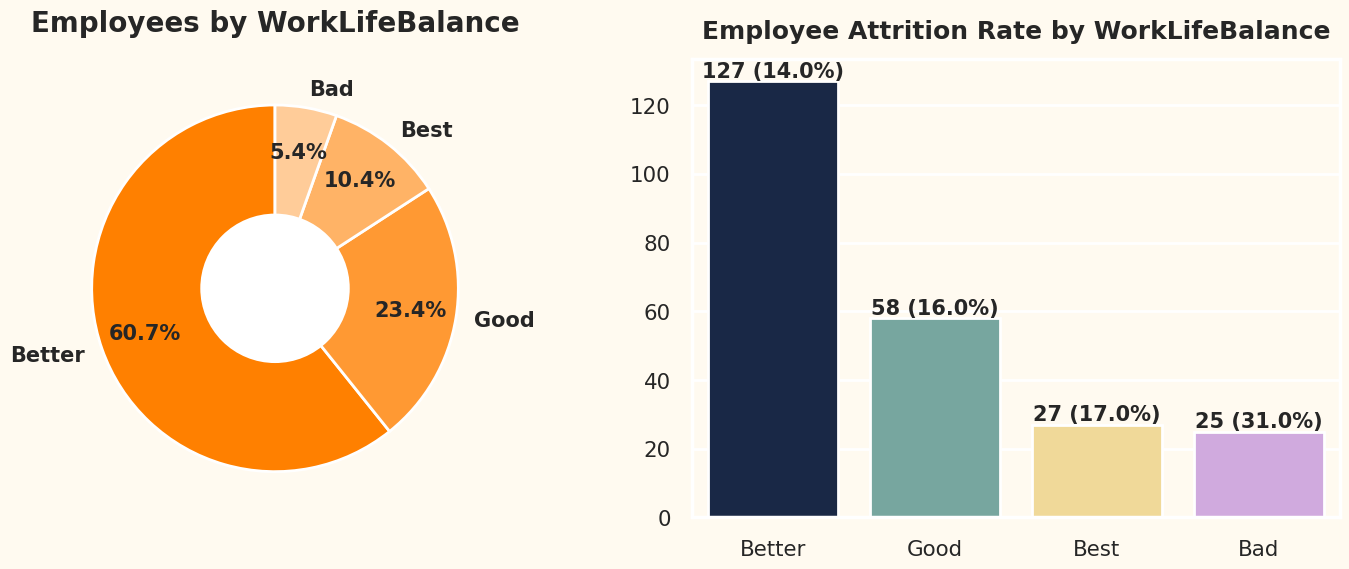

In [ ]:
# Визуализация для отображения общего количества сотрудников по WorkLifeBalance
plt.figure(figsize=(14.5,6))
plt.subplot(1,2,1)
value_1 = df["WorkLifeBalance"].value_counts()
plt.title("Employees by WorkLifeBalance", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Визуализация, показывающая коэффициент отсева по WorkLifeBalance
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["WorkLifeBalance"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by WorkLifeBalance",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=15)
plt.tight_layout()
plt.show()

1. Более 60% сотрудников имеют лучший баланс между работой и личной жизнью.
2. Сотрудники с плохим балансом между работой и личной жизнью имеют очень высокий уровень отсева.
3. Другие категории также имеют высокий коэффициент истощения.

# Анализ увольнения сотрудников по общему количеству рабочих лет.

In [ ]:
# Определяем края бинов для групп
bin_edges = [0, 5, 10, 20, 50]

# Определяем метки для групп
bin_labels = ['0-5 years', '5-10 years', '10-20 years', "20+ years"]

# Разделяем столбец DailyRate на группы
df["TotalWorkingYearsGroup"] = pd.cut(df['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)

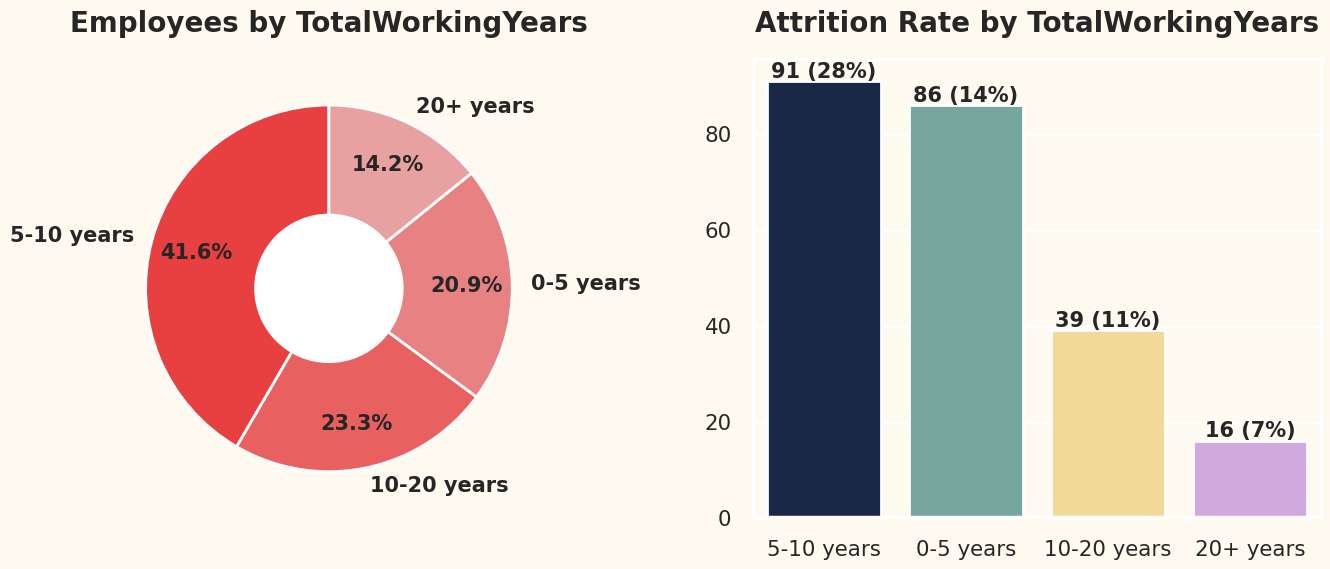

In [ ]:
# Визуализация для отображения общего количества сотрудников по TotalWorkingYearsGroup
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["TotalWorkingYearsGroup"].value_counts()
plt.title("Employees by TotalWorkingYears", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Визуализация для отображения коэффициента убыли по TotalWorkingYearsGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["TotalWorkingYearsGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by TotalWorkingYears",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Большинство сотрудников имеют общий стаж работы от 5 до 10 лет. Но их коэффициент истощения также **очень высок.
2. Сотрудники со стажем работы менее 10 лет имеют высокий уровень убыли.
3. Сотрудники со стажем работы более 10 лет имеют Меньший процент выбытия.

# Анализ увольнения сотрудников по годам работы в компании

In [ ]:
# Определяем края бинов для групп
bin_edges = [0, 1, 5, 10, 20]

# Определяем метки для групп
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Разделяем столбец DailyRate на группы
df["YearsAtCompanyGroup"] = pd.cut(df['YearsAtCompany'], bins=bin_edges, labels=bin_labels)

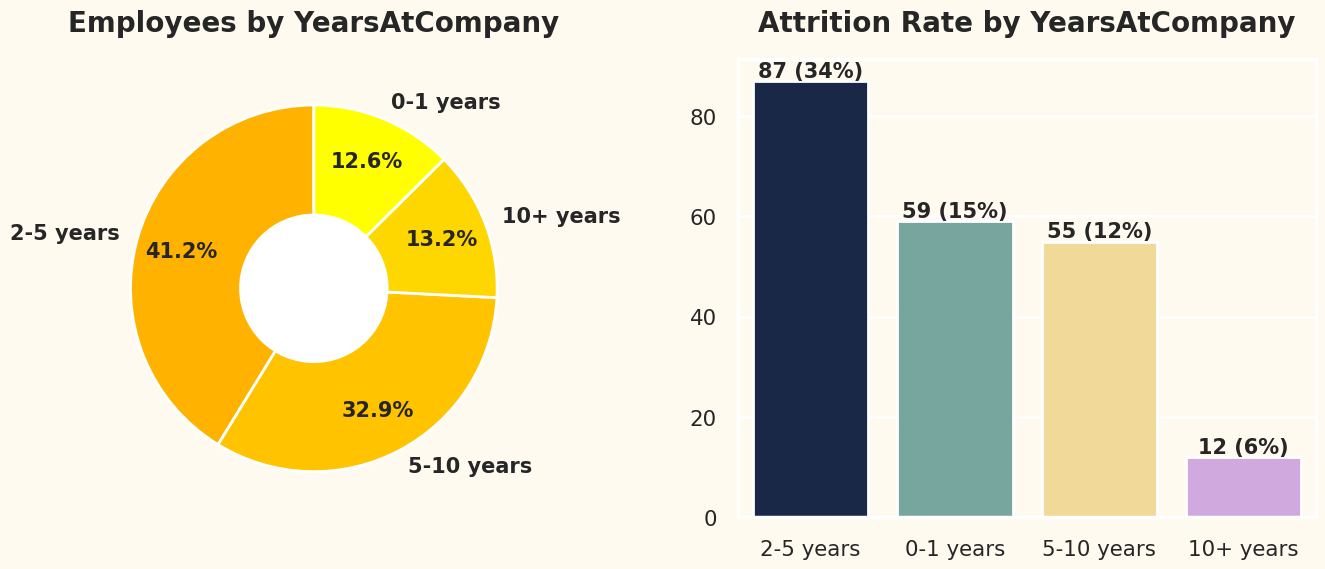

In [ ]:
# Визуализация для отображения общего количества сотрудников по годам в группе компаний.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsAtCompanyGroup"].value_counts()
plt.title("Employees by YearsAtCompany", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Визуализация для отображения коэффициента убыли по годам в компании.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsAtCompanyGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsAtCompany",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Большинство сотрудников проработали в организации от 2 до 10 лет.
2. Очень немногие сотрудники работают менее 1 года или более 10 лет.
3. Сотрудник, проработавший 2-5 лет, имеет очень высокий процент выбытия.
4. У сотрудников, проработавших более 10 лет, низкий уровень текучести кадров.

# Анализ увольнения сотрудников по годам в текущей должности

In [ ]:
# Определяем края бинов для групп
bin_edges = [0, 1, 5, 10, 20]

# Определяем метки для групп
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Разделяем столбец DailyRate на группы
df["YearsInCurrentRoleGroup"] = pd.cut(df['YearsInCurrentRole'], bins=bin_edges, labels=bin_labels)

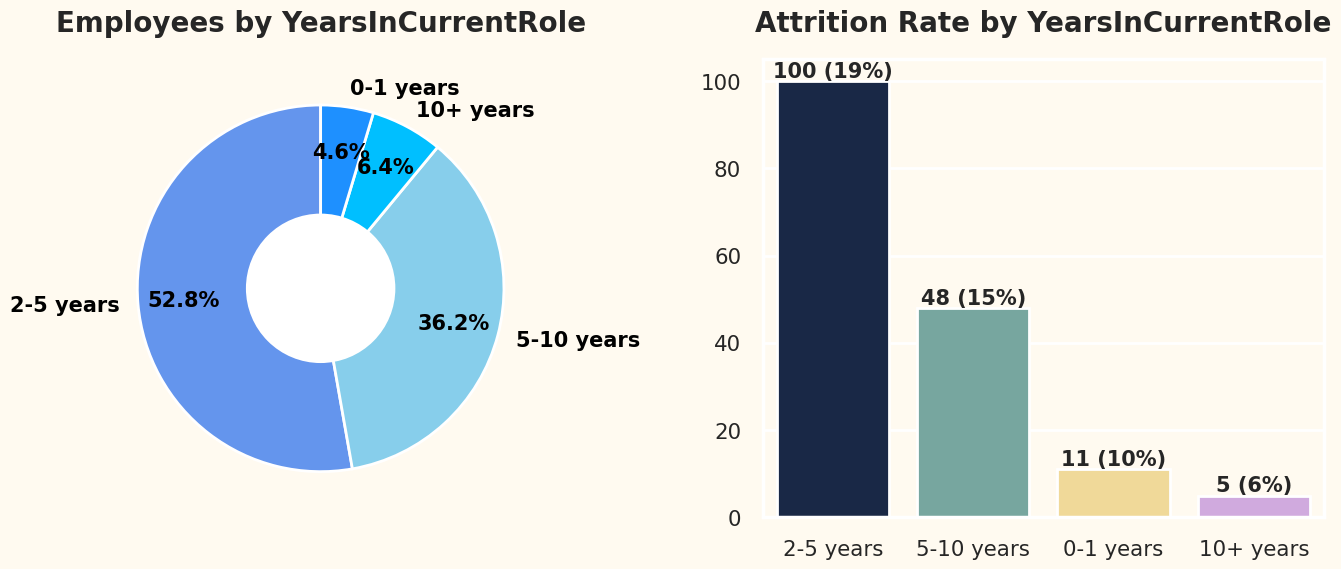

In [ ]:
# Визуализация для отображения общего числа сотрудников по YearsInCurrentRoleGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsInCurrentRoleGroup"].value_counts()
plt.title("Employees by YearsInCurrentRole", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],textprops={"fontweight":"black","size":15,"color":"black"})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Визуализация для отображения коэффициента убыли по YearsInCurrentRoleGroup
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsInCurrentRoleGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette= ["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsInCurrentRole",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Большинство сотрудников проработали от 2 до 10 лет на одной и той же должности в организации.
2. Очень немногие сотрудники проработали менее 1 года или более 10 лет на одной и той же должности.
3. Сотрудник, проработавший от 2 до 0 лет на одной и той же должности, имеет очень высокий уровень увольнения.
4. У сотрудников, проработавших более 10 лет на одной и той же должности, низкий уровень текучести кадров.

# Анализ увольнения сотрудников по годам с момента последнего повышения.

In [ ]:
# Определяем края бинов для групп
bin_edges = [0, 1, 5, 10, 20]

# Определяем метки для групп
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Разделяем столбец DailyRate на группы
df["YearsSinceLastPromotionGroup"] = pd.cut(df['YearsSinceLastPromotion'], bins=bin_edges, labels=bin_labels)

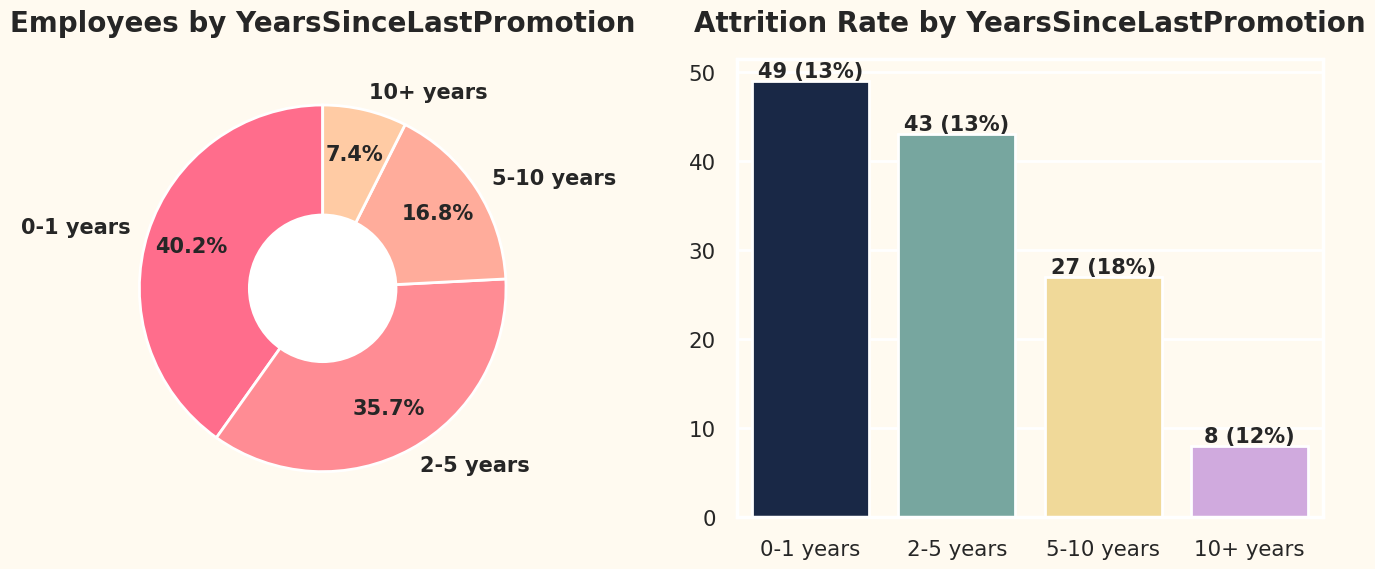

In [ ]:
# Визуализация для отображения общего количества сотрудников по YearsSinceLastPromotionGroup
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsSinceLastPromotionGroup"].value_counts()
plt.title("Employees by YearsSinceLastPromotion", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)


# Визуализация для отображения коэффициента отсева по YearsSinceLastPromotionGroup
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsSinceLastPromotionGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

plt.title("Attrition Rate by YearsSinceLastPromotion",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Почти 36% сотрудников не получали повышения от 2 до 5 лет.
2. Почти 8% сотрудников не продвигались по службе более 10 лет.
3. Все категории в этой функции имеют высокий уровень отсева, особенно сотрудники, которые не получали повышения более 5 лет.

# Анализ убыли сотрудников по годам с текущим менеджером.

In [ ]:
# Определяем края бинов для групп
bin_edges = [0, 1, 5, 10, 20]

# Определяем метки для групп
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Разделяем столбец DailyRate на группы
df["YearsWithCurrManagerGroup"] = pd.cut(df['YearsWithCurrManager'], bins=bin_edges, labels=bin_labels)

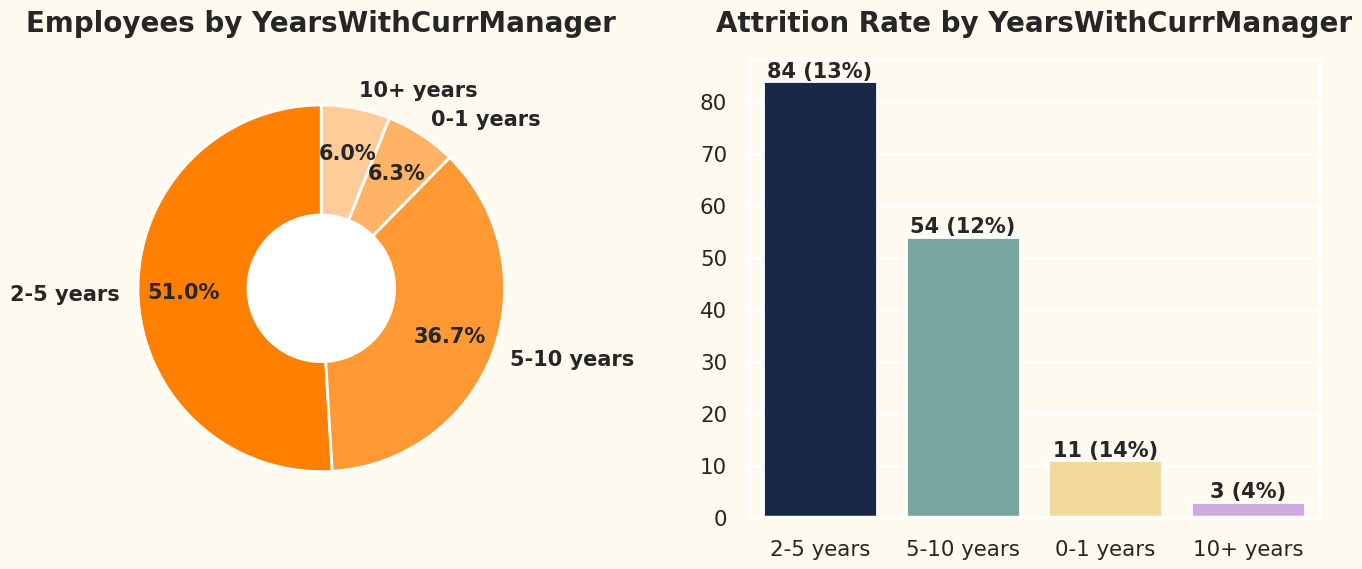

In [ ]:
# Визуализация для отображения общего количества сотрудников по YearsWithCurrManagerGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsWithCurrManagerGroup"].value_counts()
plt.title("Employees by YearsWithCurrManager", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)


# Визуализация для отображения коэффициента убыли по YearsWithCurrManagerGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsWithCurrManagerGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsWithCurrManager",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

1. Почти 51% сотрудников проработали 2-5 лет у одного и того же руководителя.
2. Почти 38% сотрудников проработали 5-10 лет у одного и того же руководителя.
3. Сотрудник, проработавший более 10 лет с одним и тем же руководителем, имеет очень низкий уровень увольнения.
4. Другие категории имеют высокий уровень отсева.

# Статистический анализ

# Выполнение теста ANOVA для анализа важности числовых характеристик в убыли сотрудников.

- Тест Anova используется для анализа влияния различных числовых характеристик на категориальную характеристику ответа.
- Тест Anova возвращает два статистических значения f_score и p_value.
- Примечание:
1. Более высокий F-показатель указывает на более сильную связь между независимой переменной (переменными) и зависимой переменной.
2. Если p-значение ниже выбранного вами уровня значимости (например, p меньше 0,05), мы можем отклонить нашу нулевую гипотезу.

In [ ]:
num_cols = df.select_dtypes(np.number).columns

In [ ]:
new_df = df.copy()

new_df["Attrition"] = new_df["Attrition"].replace({"No":0,"Yes":1})

In [ ]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_df[column],new_df["Attrition"])

    f_scores[column] = f_score
    p_values[column] = p_value

# Визуализация F_Score теста ANOVA для каждого числового признака

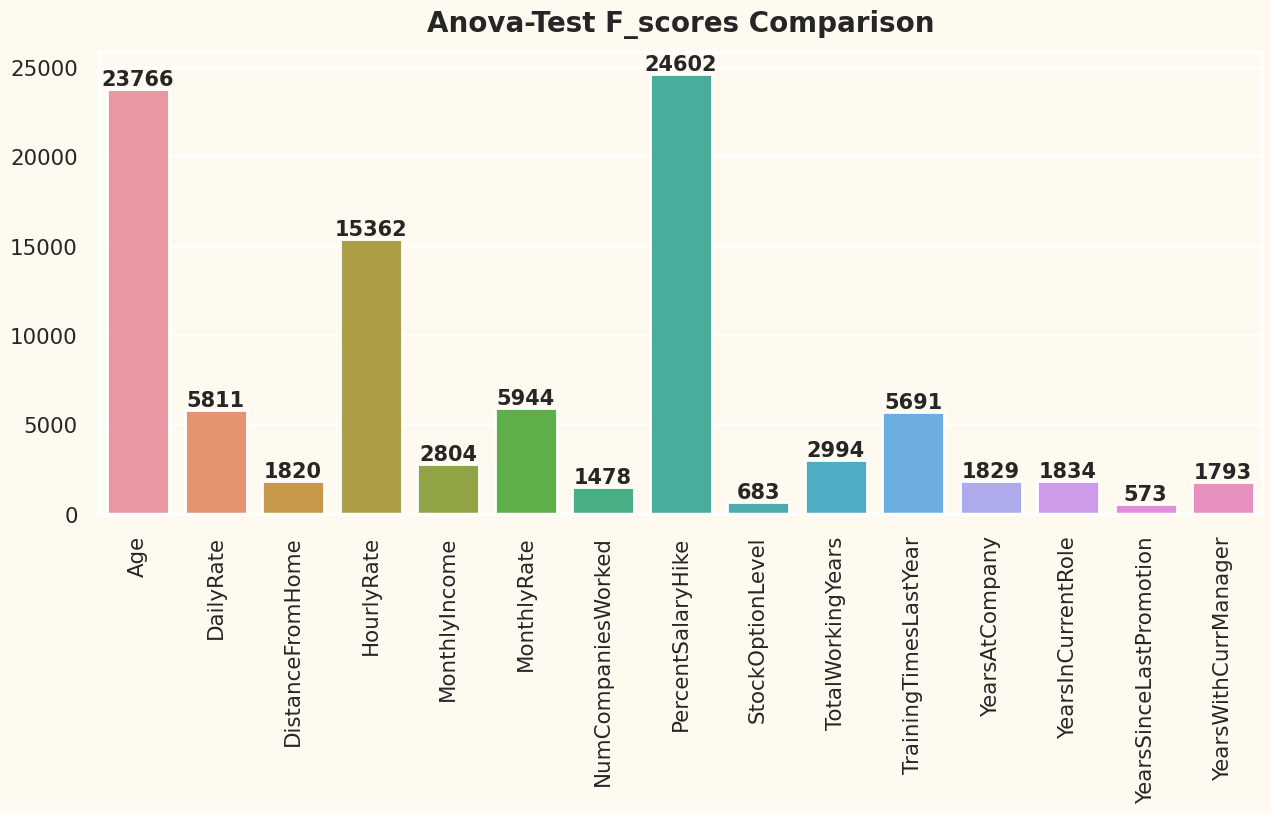

In [ ]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)
plt.show()

# Сравнение F_Score и P_value теста ANOVA

In [ ]:
test_df = pd.DataFrame({"Features":keys,"F_Score":values})
test_df["P_value"] = [format(p, '.20f') for p in list(p_values.values())]

In [ ]:
test_df

,Features,F_Score,P_value
0,Age,23766.934042,0.00000000000000000000
1,DailyRate,5811.796569,0.00000000000000000000
2,DistanceFromHome,1820.614585,0.00000000000000000000
3,HourlyRate,15362.122371,0.00000000000000000000
4,MonthlyIncome,2804.459632,0.00000000000000000000
5,MonthlyRate,5944.089071,0.00000000000000000000
6,NumCompaniesWorked,1478.188633,0.00000000000000000000
7,PercentSalaryHike,24602.507947,0.00000000000000000000
8,StockOptionLevel,683.069576,0.00000000000000000000
9,TotalWorkingYears,2994.906310,0.00000000000000000000


- Следующие функции показывают сильную связь с истощением, о чем свидетельствуют их высокие F-показатели и очень низкие p-значения.
1. Возраст
2. Ежедневная ставка
3. Почасовая ставка
4. Ежемесячный доход
5. Месячная ставка
6. Количество компаний, работающих
7. Процент повышения зарплаты
8. Общее количество рабочих лет
9. Время обучения в прошлом году
10 лет в компании
11. Годы с CurrManager
- Следующие функции не имеют существенной связи с отсевом из-за их умеренных F-показателей и чрезвычайно высоких p-значений.
1. Расстояние от дома
2. Уровень акций
3. Годы в текущей роли
4. Годы с момента последнего повышения
- Для организации важно обращать внимание на выявленные существенные особенности и учитывать их при реализации стратегии по снижению показателей убыли.

# Выполнение Chi-Square Test для анализа важности категориального признака в убыли сотрудников.

In [ ]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [ ]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

Визуализация статистических значений Chi-Square каждой категориальной функции.

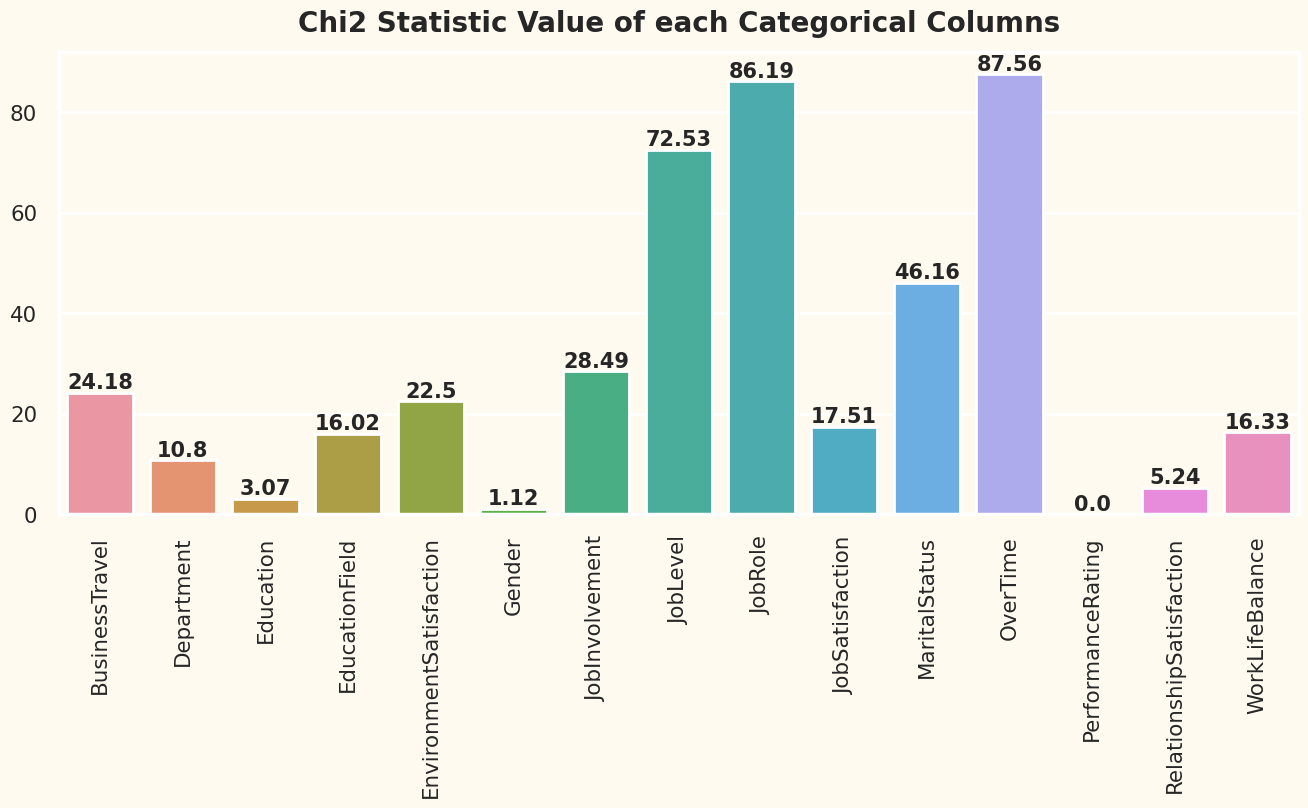

In [ ]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=20,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",fontweight="black",size=15)

plt.show()

# Сравнение Chi2_Statistic и P_value теста Chi_Square.

In [ ]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]

In [ ]:
test_df

,Features,Chi_2 Statistic,P_value
0,BusinessTravel,24.182414,0.00000560861447644993
1,Department,10.796007,0.00452560657447963286
2,Education,3.073961,0.54552533765659494414
3,EducationField,16.024674,0.00677398013902521211
4,EnvironmentSatisfaction,22.503881,0.00005123468906289433
5,Gender,1.116967,0.29057244902890855265
6,JobInvolvement,28.492021,0.00000286318063671342
7,JobLevel,72.529013,0.00000000000000663468
8,JobRole,86.190254,0.00000000000000275248
9,JobSatisfaction,17.505077,0.00055630045103875563


- Следующие функции показали статистически значимую связь с увольнением сотрудников:
1. Департамент
2. Область образования
3. Удовлетворение окружающей среды
4. Вовлеченность в работу
5. Уровень работы
6. Должностная роль
7. Удовлетворенность работой
8. Семейное положение
9. Сверхурочные
10. Баланс работы и жизни
- Следующие функции не показали статистически значимых связей с истощением.
1. Пол
2. Образование
3. Рейтинг производительности
4. Удовлетворение отношений
- Для организации важно обращать внимание на выявленные существенные особенности и учитывать их при реализации стратегии по снижению коэффициента выбытия.

# Заключение

Ключевые результаты:

1. Несколько переменных показали значительную связь с увольнением сотрудников, что указывает на их важность для прогнозирования риска увольнения.
2. Числовые переменные включают факторы, связанные с:
- Возраст
- Компенсация (например, MonthlyIncome и PercentSalaryHike).
- Опыт работы (например, TotalWorkingYears и YearsAtCompany).
- Определенные переменные, связанные с работой (например, JobRole и YearsInCurrentRole).
3. Категориальные переменные включают факторы, связанные с:
- Аспекты, связанные с работой (например, отдел, область образования, должность и семейное положение).
- Факторы, связанные с работой (такие как EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, OverTime и WorkLifeBalance)

# Ограничения:

1. Анализ основан на доступном наборе данных и может не охватывать все возможные факторы, влияющие на увольнение сотрудников.
2. Могут быть и другие неизмеряемые переменные, которые играют роль в убыли.

# Рекомендации

- Приведенные ниже рекомендации основаны на ключевых выводах, касающихся снижения уровня отсева.
1. Возраст:
- Внедрение стратегий для удовлетворения конкретных потребностей и карьерных стремлений сотрудников разных возрастных групп. - Это может включать предложение целевых возможностей развития, программ наставничества и гибких условий работы для поддержания баланса между работой и личной жизнью.
2. Компенсация:
- Регулярно пересматривайте и оценивайте компенсационные пакеты, чтобы убедиться, что они конкурентоспособны на рынке.
- Рассмотрите возможность включения стимулов и вознаграждений, основанных на результатах, для мотивации сотрудников и признания их вклада.
3. Опыт работы:
- Предоставлять возможности для карьерного роста, развития навыков и кросс-функционального обучения.
- Установите четкие карьерные пути и регулярно предоставляйте отзывы и оценки эффективности для поддержки роста и вовлеченности сотрудников.
4. Конкретные переменные, связанные с работой: - Адаптируйте стратегии удержания на основе различных должностных ролей и обязанностей.
- Это может включать в себя повышение удовлетворенности работой, выполнение сложных заданий и создание позитивной рабочей атмосферы.
5. Аспекты, связанные с работой:
- Повышайте вовлеченность сотрудников и удовлетворенность работой, предлагая благоприятную рабочую среду.
- Предоставлять возможности для профессионального развития, продвигать культуру непрерывного обучения и обеспечивать справедливые и прозрачные процессы продвижения по службе и карьерного роста.
6. Факторы, связанные с работой:
- Сосредоточьтесь на улучшении таких факторов, как удовлетворенность окружающей средой, вовлеченность в работу, удовлетворенность работой, баланс между работой и личной жизнью и управление сверхурочной работой.
- Проводите регулярные опросы сотрудников, чтобы понять их проблемы и отзывы, и примите упреждающие меры для решения любых выявленных областей улучшения.
7. В целом:
- Поощряйте позитивную организационную культуру, которая ценит благополучие сотрудников, баланс между работой и личной жизнью и возможности роста.
- Поощряйте открытое общение, предоставляйте возможности для обратной связи и предложений, а также регулярно оценивайте и уточняйте стратегии удержания на основе отзывов сотрудников и меняющихся потребностей.